<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge
>Author: Amoz, Gilbert, Syahiran


### **Problem Statement**

When it comes to property prices in Singapore, the on-ground sentiments we often hear are — "so expensive", "so far", "is it worth the price?"

Yet, there still seems to be a preference amongst some to stay in the central region due to convenience and general accessibility. In our study, we examine how the price of resale HDB flats, particularly in the central region, are influenced by various factors like floor area, age of HDB flat, maximum floor level, proximity to amenities and public transport connectivity.

Ultimately, we aim to address the following question: **"Are resale prices of central region HDBs influenced primarily by its location?"**

In doing so, we hope to empower our target audience to make more calculated and informed decisions on housing whether it's young couples buying their first flats, or older families looking to sell their flats

### **Target Client Profile**
- Mr and Mrs Tan
    - 2 children (age 2 and 5)
    - Living in a 4-room HDB flat in Tampines
    - Intend to upgrade to a 5-room HDB flat
    - Central location is preferred, but not a must
    - Accessibility by public transport is highly important
    - Less than $550k budget


These are the notebooks for this project:  
 1. [`01 Data Preprocessing`](01_data_preprocessing.ipynb)
 2. [`02 EDA and Modelling`](02_eda_modelling.ipynb)

 ---

 # This Notebook: 02_EDA_Modelling

 This notebook consists of the section:
 1. Exploratory Data Analysis
 2. Modelling

---

#### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#### **Import Datasets**

The cleaned dataset is imported for this notebook.

In [2]:
#import datasets
df_train = pd.read_csv('../datasets/train-clean.csv')
df_test = pd.read_csv('../datasets/test-clean.csv')

#### **Overview of Datasets**

In [3]:
df_train.head(5)

id tranc_yearmonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 78 columns]

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

In [5]:
df_test.head(5)

id tranc_yearmonth         town flat_type block          street_name  \
0  114982         2012-11       YISHUN    4 ROOM   173         YISHUN AVE 7   
1   95653         2019-08  JURONG WEST    5 ROOM  986C    JURONG WEST ST 93   
2   40303         2013-10   ANG MO KIO    3 ROOM   534    ANG MO KIO AVE 10   
3  109506         2017-10    WOODLANDS    4 ROOM    29         MARSILING DR   
4  100149         2016-08  BUKIT BATOK    4 ROOM   170  BT BATOK WEST AVE 8   

  storey_range  floor_area_sqm         flat_model  lease_commence_date  ...  \
0     07 TO 09            84.0         Simplified                 1987  ...   
1     04 TO 06           112.0  Premium Apartment                 2008  ...   
2     07 TO 09            68.0     New Generation                 1980  ...   
3     01 TO 03            97.0     New Generation                 1979  ...   
4     16 TO 18           103.0            Model A                 1985  ...   

   vacancy  pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0       92                    0          1.433681         103.832924   
1       45                    0          1.339244         103.698896   
2       36                    0          1.371893         103.851811   
3       54                    0          1.434423         103.773698   
4       40                    0          1.349195         103.741000   

   sec_sch_nearest_dist                    sec_sch_name cutoff_point  \
0            156.322353  Ahmad Ibrahim Secondary School          218   
1            739.371688    Jurong West Secondary School          199   
2            305.071191       Anderson Secondary School          245   
3            433.454591      Woodlands Secondary School          188   
4            217.295361    Bukit Batok Secondary School          223   

  affiliation  sec_sch_latitude  sec_sch_longitude  
0           0          1.436235         103.829987  
1           0          1.335256         103.702098  
2           0          1.374242         103.851430  
3           0          1.439183         103.774499  
4           0          1.348351         103.740873  

[5 rows x 77 columns]

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   tranc_yearmonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  tranc_year                 16737 non-null  int64  
 11  tranc_month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

**Check null values**

Checking for null values in datasets is crucial for identifying missing or incomplete data, which can significantly impact the accuracy and reliability of data analysis. By detecting and addressing these null values, one can ensure data integrity and make informed decisions about appropriate handling strategies, such as imputation or removal.

In [7]:
df_train.isnull().sum()

id                   0
tranc_yearmonth      0
town                 0
flat_type            0
block                0
                    ..
sec_sch_name         0
cutoff_point         0
affiliation          0
sec_sch_latitude     0
sec_sch_longitude    0
Length: 78, dtype: int64

In [8]:
df_test.isnull().sum()

id                   0
tranc_yearmonth      0
town                 0
flat_type            0
block                0
                    ..
sec_sch_name         0
cutoff_point         0
affiliation          0
sec_sch_latitude     0
sec_sch_longitude    0
Length: 77, dtype: int64

There are no null values identified from both train and test datasets.

#### **Data Dictionary**

A data dictionary serves as a comprehensive guide that documents and standardizes data elements within a system, ensuring consistency and clarity across an organization. It enhances data quality management and governance by defining data attributes, ownership, and compliance requirements, thereby supporting effective data usage and analysis. As a centralized reference, it improves communication among stakeholders and facilitates a better understanding and interpretation of data for various business and technical processes.

In [42]:
#To assist creating data dict
for header,item in df_train.items():
    if item.dtype == 'int64':
        print(f"|{header}|*integer*|train-clean| |")
    elif item.dtype == 'float64':
        print(f"|{header}|*float*|train-clean| |")
    else: 
        print(f"|{header}|*str*|train-clean| |")


|id|*integer*|train-clean| |
|tranc_yearmonth|*str*|train-clean| |
|town|*str*|train-clean| |
|flat_type|*str*|train-clean| |
|block|*str*|train-clean| |
|street_name|*str*|train-clean| |
|storey_range|*str*|train-clean| |
|floor_area_sqm|*float*|train-clean| |
|flat_model|*str*|train-clean| |
|lease_commence_date|*integer*|train-clean| |
|resale_price|*float*|train-clean| |
|tranc_year|*integer*|train-clean| |
|tranc_month|*integer*|train-clean| |
|mid_storey|*integer*|train-clean| |
|lower|*integer*|train-clean| |
|upper|*integer*|train-clean| |
|mid|*integer*|train-clean| |
|full_flat_type|*str*|train-clean| |
|address|*str*|train-clean| |
|floor_area_sqft|*float*|train-clean| |
|price_per_sqft|*float*|train-clean| |
|hdb_age|*integer*|train-clean| |
|max_floor_lvl|*integer*|train-clean| |
|year_completed|*integer*|train-clean| |
|residential|*integer*|train-clean| |
|commercial|*integer*|train-clean| |
|market_hawker|*integer*|train-clean| |
|multistorey_carpark|*integer*|train-cle

|Feature|Type|Dataset|Description|
|---|---|---|---|
|id|*integer*|train-clean|The property's sale price in Singapore dollars|
|tranc_yearmonth|*str*|train-clean|Year and month of the resale transaction, e.g. 2015-02|
|town|*str*|train-clean|HDB township where the flat is located, e.g. BUKIT MERAH|
|flat_type|*str*|train-clean|Type of the resale flat unit, e.g. 3 ROOM|
|block|*str*|train-clean|Block number of the resale flat, e.g. 454|
|street_name|*str*|train-clean|Street name where the resale flat resides, e.g. TAMPINES ST 42|
|storey_range|*str*|train-clean|Floor level (range) of the resale flat unit, e.g. 07 TO 09|
|floor_area_sqm|*float*|train-clean|Floor area of the resale flat unit in square metres|
|flat_model|*str*|train-clean|HDB model of the resale flat, e.g. Multi Generation|
|lease_commence_date|*integer*|train-clean|Commencement year of the flat unit's 99-year lease|
|resale_price|*float*|train-clean|The property's sale price in Singapore dollars|
|tranc_year|*integer*|train-clean|Year of resale transaction|
|tranc_month|*integer*|train-clean|Month of resale transaction|
|mid_storey|*integer*|train-clean|Median value of storey_range|
|lower|*integer*|train-clean|Lower value of storey_range|
|upper|*integer*|train-clean|Upper value of storey_range|
|mid|*integer*|train-clean|Middle value of storey_range|
|full_flat_type|*str*|train-clean|Combination of flat_type and flat_model|
|address|*str*|train-clean|Combination of block and street_name|
|floor_area_sqft|*float*|train-clean|Floor area of the resale flat unit in square feet|
|price_per_sqft|*float*|train-clean|Price per square feet|
|hdb_age|*integer*|train-clean|Number of years from lease_commence_date to present year|
|max_floor_lvl|*integer*|train-clean|Highest floor of the resale flat|
|year_completed|*integer*|train-clean|Year which construction was completed for resale flat|
|residential|*integer*|train-clean|Boolean value if resale flat has residential units in the same block|
|commercial|*integer*|train-clean|Boolean value if resale flat has commercial units in the same block|
|market_hawker|*integer*|train-clean|Boolean value if resale flat has a market or hawker centre in the same block|
|multistorey_carpark|*integer*|train-clean|Boolean value if resale flat has a multistorey carpark in the same block|
|precinct_pavilion|*integer*|train-clean|Boolean value if resale flat has a pavilion in the same block|
|total_dwelling_units|*integer*|train-clean|Total number of residential dwelling units in the resale flat|
|1room_sold|*integer*|train-clean|Number of 1-room residential units in the resale flat|
|2room_sold|*integer*|train-clean|Number of 2-room residential units in the resale flat|
|3room_sold|*integer*|train-clean|Number of 3-room residential units in the resale flat|
|4room_sold|*integer*|train-clean|Number of 4-room residential units in the resale flat|
|5room_sold|*integer*|train-clean|Number of 5-room residential units in the resale flat|
|exec_sold|*integer*|train-clean|Number of executive type residential units in the resale flat block|
|multigen_sold|*integer*|train-clean|Number of multi-generational type residential units in the resale flat block|
|studio_apartment_sold|*integer*|train-clean|Number of studio apartment type residential units in the resale flat block|
|1room_rental|*integer*|train-clean|Number of 1-room rental residential units in the resale flat block|
|2room_rental|*integer*|train-clean|Number of 2-room rental residential units in the resale flat block|
|3room_rental|*integer*|train-clean|Number of 3-room rental residential units in the resale flat block|
|other_room_rental|*integer*|train-clean|Number of "other" type rental residential units in the resale flat block|
|postal|*str*|train-clean|Postal code of the resale flat block|
|latitude|*float*|train-clean|Latitude based on postal code|
|longitude|*float*|train-clean|Longitude based on postal code|
|planning_area|*str*|train-clean|Government planning area that the flat is located|
|mall_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest mall|
|mall_within_500m|*float*|train-clean|Number of malls within 500 metres|
|mall_within_1km|*float*|train-clean|Number of malls within 1 kilometre|
|mall_within_2km|*float*|train-clean|Number of malls within 2 kilometres|
|hawker_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest hawker centre|
|hawker_within_500m|*float*|train-clean|Number of hawker centres within 500 metres|
|hawker_within_1km|*float*|train-clean|Number of hawker centres within 1 kilometre|
|hawker_within_2km|*float*|train-clean|Number of hawker centres within 2 kilometres|
|hawker_food_stalls|*integer*|train-clean|Number of hawker food stalls in the nearest hawker centre|
|hawker_market_stalls|*integer*|train-clean|Number of hawker and market stalls in the nearest hawker centre|
|mrt_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest MRT station|
|mrt_name|*str*|train-clean|Name of the nearest MRT station|
|bus_interchange|*integer*|train-clean|Boolean value if the nearest MRT station is also a bus interchange|
|mrt_interchange|*integer*|train-clean|Boolean value if the nearest MRT station is a train interchange station|
|mrt_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest MRT station|
|mrt_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest MRT station|
|bus_stop_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest bus stop|
|bus_stop_name|*str*|train-clean|Name of the nearest bus stop|
|bus_stop_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest bus stop|
|bus_stop_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest bus stop|
|pri_sch_nearest_distance|*float*|train-clean|Distance (in metres) to the nearest primary school|
|pri_sch_name|*integer*|train-clean|Name of the nearest primary school|
|vacancy|*integer*|train-clean|Number of vacancies in the nearest primary school|
|pri_sch_affiliation|*integer*|train-clean|Boolean value if the nearest primary school has a secondary school affiliation|
|pri_sch_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest primary school|
|pri_sch_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest primary school|
|sec_sch_nearest_dist|*float*|train-clean|Distance (in metres) to the nearest secondary school|
|sec_sch_name|*integer*|train-clean|Name of the nearest secondary school|
|cutoff_point|*integer*|train-clean|PSLE cutoff point of the nearest secondary school|
|affiliation|*integer*|train-clean|Boolean value if the nearest secondary school has an primary school affiliation|
|sec_sch_latitude|*float*|train-clean|Latitude (in decimal degrees) of the the nearest secondary school|
|sec_sch_longitude|*float*|train-clean|Longitude (in decimal degrees) of the nearest secondary school|
|region|*integer*|train-clean|Distribution of Central Region and Outside of Central Region|

### **1. Data Preprocessing**

We will convert some features of interest from `object` datatype numerical values by grouping them into specified groups. The processing consists of the following 
1. Categorizing `pri_sch_name` and `sec_sch_name` to top school or other school
2. Creating new features **region**, from `planning area` to central region or outside central region
3. Categorizing `town` to mature or non mature estate 

#### **1.1 Categorizing `pri_sch_name` and `sec_sch_name`**

Convert pri_sch_name and sec_sch_name to numerical value by classifying them as:

* Top school = 1
* Other School = 0

Top school definition is based on the following source:

* [`2022 Primary School Ranking`](https://schoolbell.sg/primary-school-ranking/)
* [`2022 Secondary School Ranking`](https://schoolbell.sg/secondary-school-ranking/)

In [9]:
#create top school list for primary school and secondary school
top_pri_sch = ['Rosyth School','Nan Hua Primary School',"Saint Hilda's Primary School",
               'Catholic High School','Henry Park Primary School','Nanyang Primary School',
               'Tao Nan School',"Raffles Girls' School"]

top_sec_sch = ["Raffles Girls' School", 'Raffles Institution',"CHIJ Saint Nicholas Girls' School",
               'Anglo-Chinese School',"Methodist Girls' School",'Dunman High School','Catholic High School',
               "Cedar Girls' Secondary School",'Temasek Junior College','River Valley High School']

#convert school name to numerical value based on top school or others
#convert train datasets 
df_train['pri_sch_name'] = df_train['pri_sch_name'].apply(lambda x: 1 if x in top_pri_sch else 0)
df_train['sec_sch_name'] = df_train['sec_sch_name'].apply(lambda x: 1 if x in top_sec_sch else 0)

# #convert test datasets
df_test['pri_sch_name'] = df_test['pri_sch_name'].apply(lambda x: 1 if x in top_pri_sch else 0)
df_test['sec_sch_name'] = df_test['sec_sch_name'].apply(lambda x: 1 if x in top_sec_sch else 0)


#### **1.2 Creating `region` Features**

Create new column to distibute `planning_area` as:

* Central Region(cr) = 1
* Outside Central Region(ocr) = 0

Source: [`Definition of CCR, RCR and OCR`](https://www.propertyguru.com.sg/property-guides/ccr-ocr-rcr-region-singapore-ura-map-21045). This article explains the distribution of each `planning_area` based on the region

Note: From the source there are distrubition of 3 areas which area CCR(Central), RCR (Rest of Central Region) and OCR. For this project, CCR and RCR are combined as one defined as `Central Region` 



In [10]:
#create list of central region 
cr = ['Bukit Timah','Downtown Core','Novena','Tanglin','Bishan',
      'Geylang','Kallang','Marine Parade','Outram','Queenstown',
      'Rochor','Toa Payoh', 'Bukit Merah']

#create list of outside central region
ocr = ['Ang Mo Kio', 'Bedok','Bukit Batok','Bukit Panjang', 'Changi', 'Choa Chu Kang',
       'Clementi','Hougang','Jurong East','Jurong West','Pasir Ris','Punggol','Sembawang',
       'Sengkang','Serangoon','Tampines','Western Water Catchment','Woodlands','Yishun']

#create empty list of region
region_train = []
for place in df_train['planning_area']:
    if place in cr:
        region_train.append(1)
    else:
        region_train.append(0)

#convert from list to dataframe
region_train = pd.DataFrame(region_train, columns = ['region'])

#combine to train datasets 
df_train = pd.concat([df_train,region_train], axis=1)

#create region dataset for test model
region_test = []
for place in df_test['planning_area']:
    if place in cr:
        region_test.append(1)
    else:
        region_test.append(0)

#convert from list to dataframe
region_test = pd.DataFrame(region_test, columns = ['region'])

#combine to test datasets 
df_test = pd.concat([df_test,region_test], axis=1)

#### **1.3 Converting `town` to mature or non mature estate**


Because there is a column named as `planning area`, and it can represent `town`, convert `town` from categorical to numerical value by:

* Mature Estate = 1
* Non Mature Estate = 0 

Source: [`Non Mature and Mature Estates`](https://www.propertyguru.com.sg/property-guides/non-mature-vs-mature-bto-55760). This article explains the distribution of `town` based on mature and non-mature estate


In [11]:
#create mature estate list 
mature_estate_list = ['ANG MO KIO','BEDOK','BISHAN','BUKIT MERAH',
                      'BUKIT TIMAH','CENTRAL AREA','CLEMENTI',
                      'GEYLANG','KALLANG/WHAMPOA','MARINE PARADE',
                      'PASIR RIS','QUEENSTOWN','SERANGOON',
                      'TAMPINES','TOA PAYOH']

#train model
df_train['town'] = df_train['town'].apply(lambda x: 1 if x in mature_estate_list else 0)

#test model
df_test['town'] = df_test['town'].apply(lambda x: 1 if x in mature_estate_list else 0)


### **2. Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a critical step in data analysis that involves summarizing the main characteristics of a dataset, often visually, to uncover patterns, spot anomalies, and test hypotheses. EDA helps in understanding the underlying structure of the data, identifying any correlations between variables, and determining the quality and suitability of data for further analysis

#### **2.1 EDA - Summary Statistics**

Summary statistics provide a concise overview of a dataset's key characteristics, such as mean, median, standard deviation, and range, helping to understand its central tendency, dispersion, and overall distribution. These statistics are essential for identifying patterns, detecting outliers, and informing further data analysis and decision-making processes.

In [12]:
df_train.describe()

id           town  floor_area_sqm  lease_commence_date  \
count  150634.000000  150634.000000    150634.00000        150634.000000   
mean    93047.887496       0.441766        97.19763          1992.448464   
std     53679.906247       0.496599        24.40304            12.138829   
min         1.000000       0.000000        31.00000          1966.000000   
25%     46469.250000       0.000000        75.00000          1984.000000   
50%     93077.500000       0.000000        95.00000          1992.000000   
75%    139574.750000       1.000000       112.00000          2001.000000   
max    185966.000000       1.000000       280.00000          2019.000000   

       resale_price     tranc_year    tranc_month     mid_storey  \
count  1.506340e+05  150634.000000  150634.000000  150634.000000   
mean   4.491615e+05    2016.489551       6.580500       8.284823   
std    1.433076e+05       2.752396       3.345468       5.508074   
min    1.500000e+05    2012.000000       1.000000       2.000000   
25%    3.470000e+05    2014.000000       4.000000       5.000000   
50%    4.200000e+05    2017.000000       7.000000       8.000000   
75%    5.200000e+05    2019.000000       9.000000      11.000000   
max    1.258000e+06    2021.000000      12.000000      50.000000   

               lower          upper  ...  pri_sch_affiliation  \
count  150634.000000  150634.000000  ...        150634.000000   
mean        7.248370       9.321275  ...             0.113195   
std         5.515155       5.507364  ...             0.316832   
min         1.000000       3.000000  ...             0.000000   
25%         4.000000       6.000000  ...             0.000000   
50%         7.000000       9.000000  ...             0.000000   
75%        10.000000      12.000000  ...             0.000000   
max        49.000000      51.000000  ...             1.000000   

       pri_sch_latitude  pri_sch_longitude  sec_sch_nearest_dist  \
count     150634.000000      150634.000000         150634.000000   
mean           1.366268         103.839106            508.533220   
std            0.042669           0.072637            309.066265   
min            1.274962         103.687724             38.913475   
25%            1.337289         103.773754            290.285883   
50%            1.364639         103.844210            447.377670   
75%            1.393910         103.898773            644.284099   
max            1.456667         103.962919           3638.977233   

        sec_sch_name   cutoff_point    affiliation  sec_sch_latitude  \
count  150634.000000  150634.000000  150634.000000     150634.000000   
mean        0.031879     210.146428       0.031879          1.365986   
std         0.175677      20.010489       0.175677          0.042599   
min         0.000000     188.000000       0.000000          1.276029   
25%         0.000000     188.000000       0.000000          1.337545   
50%         0.000000     208.000000       0.000000          1.366132   
75%         0.000000     224.000000       0.000000          1.391781   
max         1.000000     260.000000       1.000000          1.453280   

       sec_sch_longitude         region  
count      150634.000000  150634.000000  
mean          103.839340       0.189021  
std             0.072630       0.391527  
min           103.687207       0.000000  
25%           103.776008       0.000000  
50%           103.842719       0.000000  
75%           103.899872       0.000000  
max           103.961105       1.000000  

[8 rows x 67 columns]

#### **2.2 EDA - Heatmap**

A heatmap is a graphical representation that uses color-coding to visualize complex data matrices, helping to easily identify patterns, correlations, and trends among variables. This tool is particularly useful in highlighting the strength of relationships within datasets, facilitating quick insights into which areas require further analysis or attention.

First, we drop columns with object data types to calculate correlations between numerical values, as heatmap correlations only work for numerical data.

In [13]:
#identify object dtype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 79 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  int64  
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

In [14]:
#drop all object dtype
df_train_num = df_train.drop(columns = ['block','street_name','storey_range','full_flat_type',
                                        'address','postal','mrt_name','bus_stop_name','tranc_yearmonth',
                                        'flat_type', 'flat_model','planning_area'])

<Axes: >

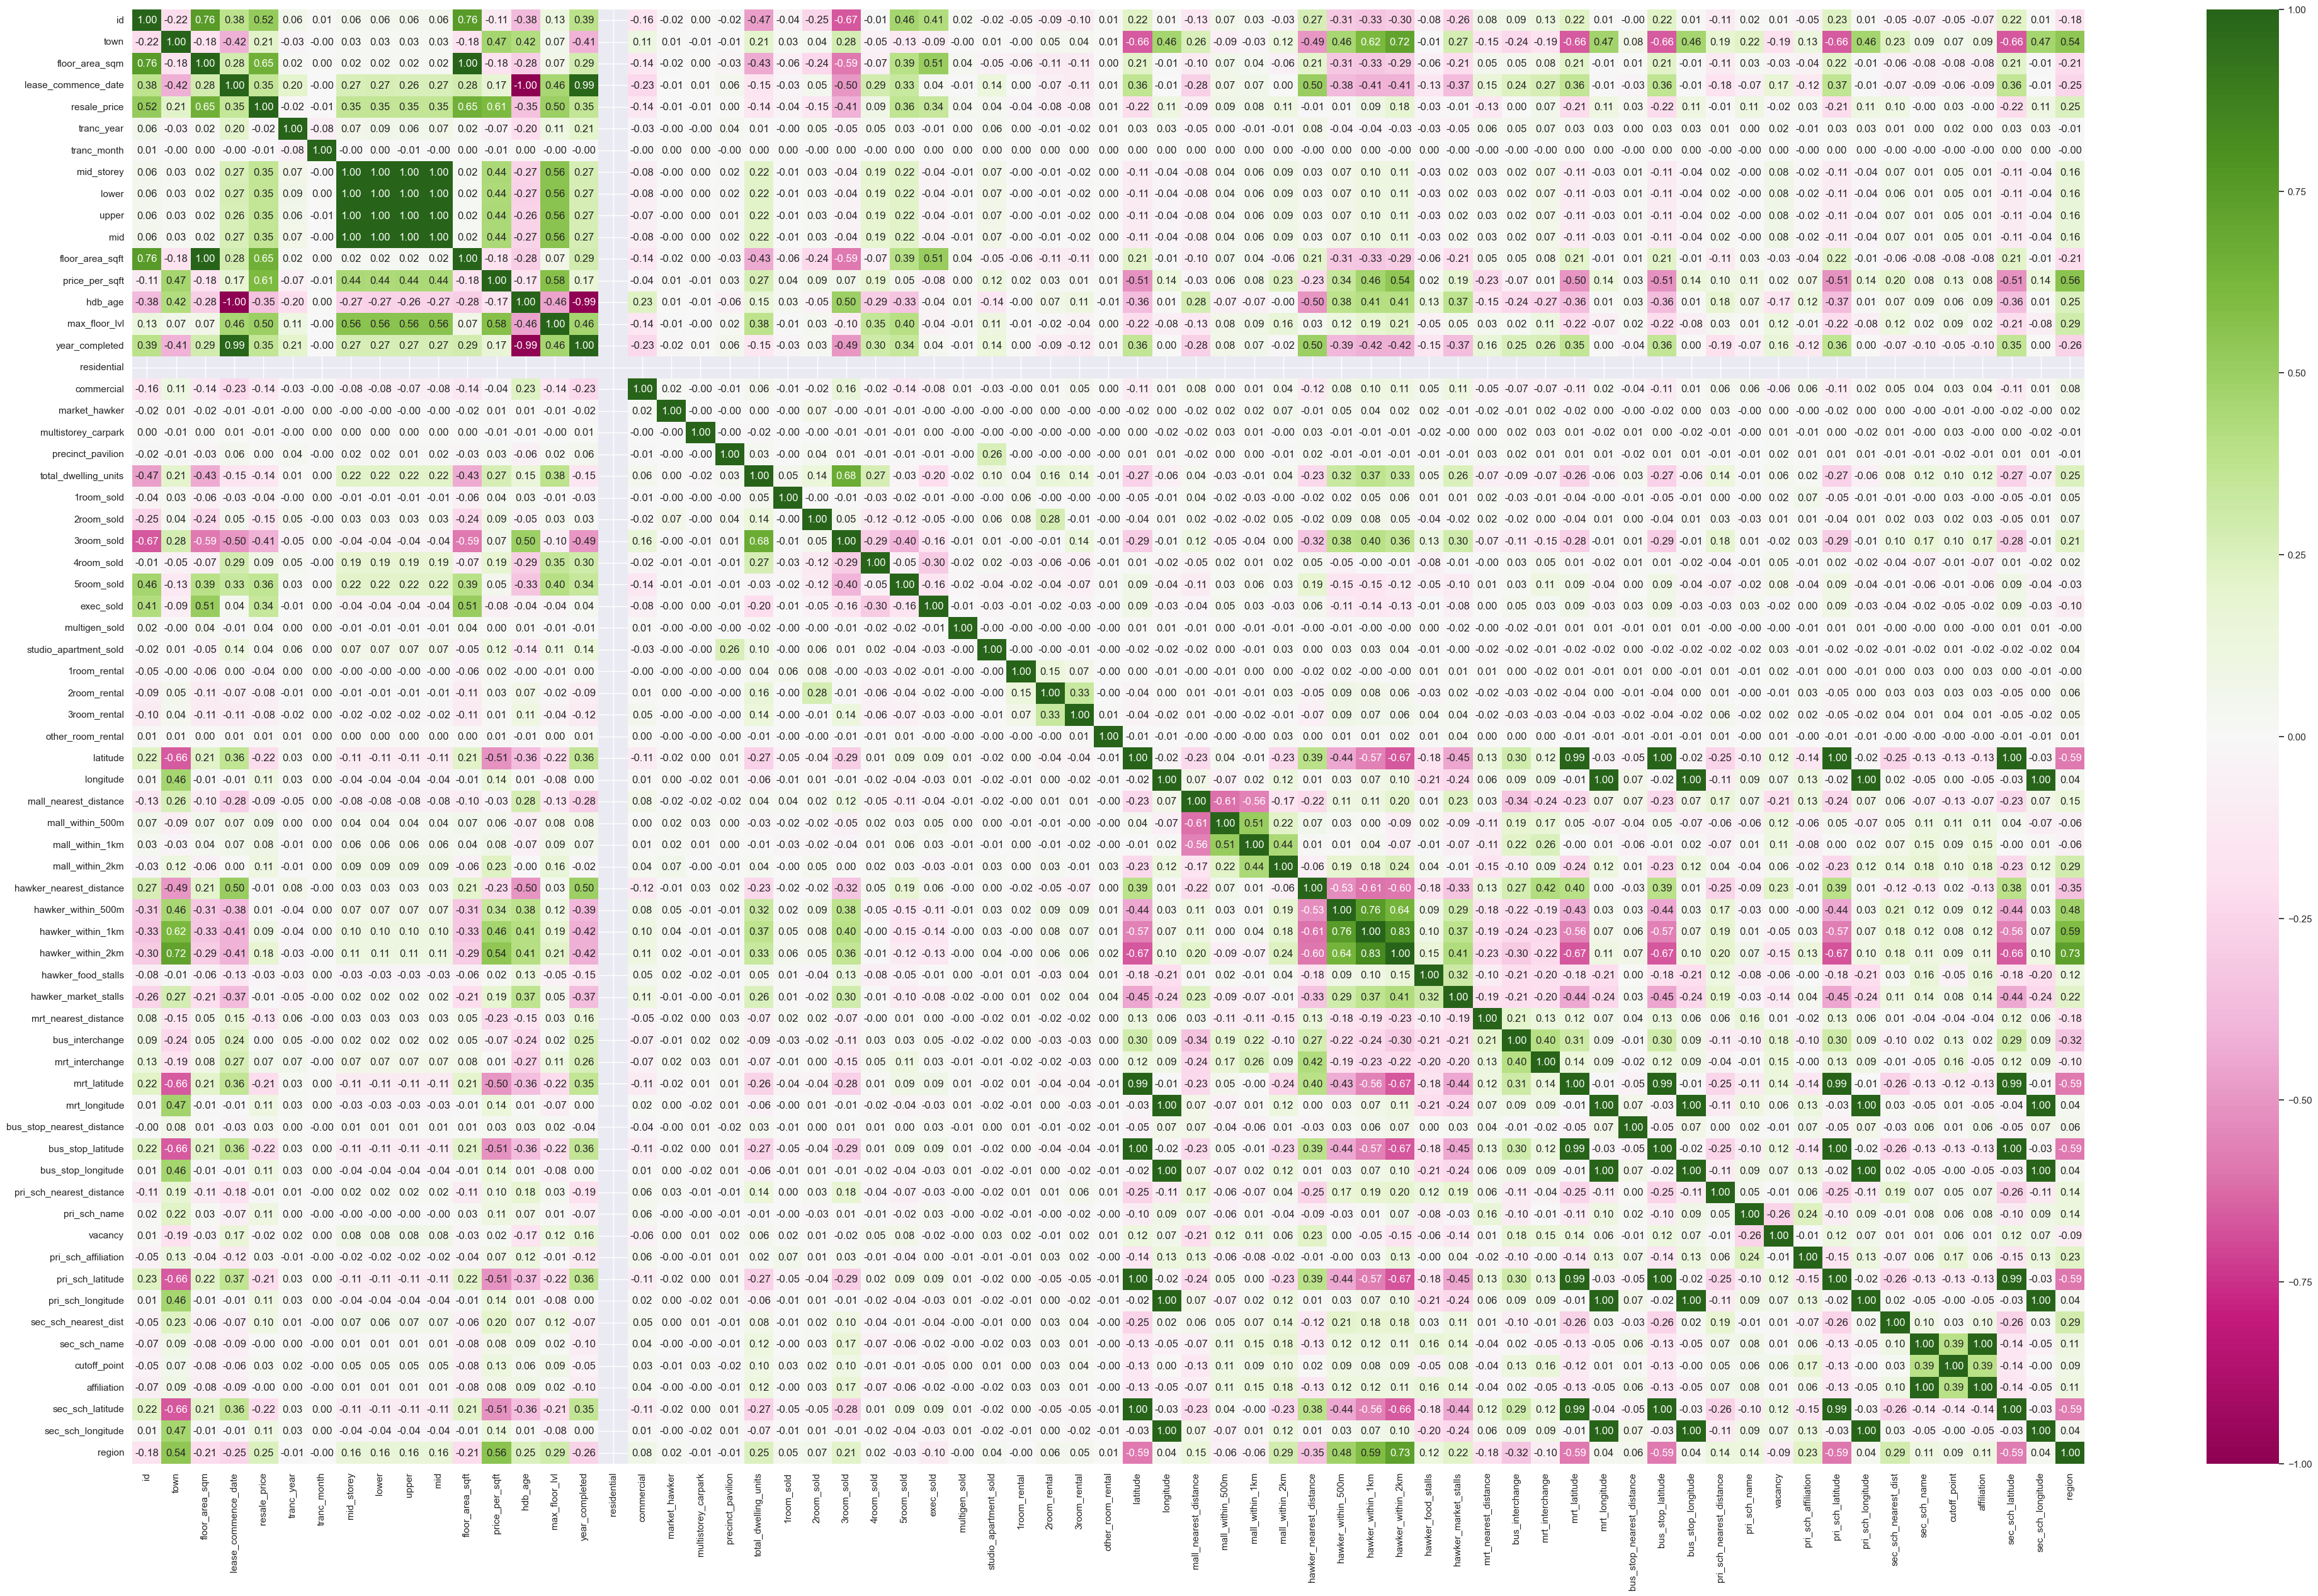

In [314]:
#create heatmap
plt.figure(figsize=(50,30))
sns.heatmap(df_train_num.corr(), cmap='PiYG', annot = True, fmt='.2f')

From the heatmap, we can identify several features that have a strong correlation with resale price, such as `floor_area_sqft`, `hdb_age`, `max_floor_lvl` and etc. Additionally, the heatmap reveals collinearity between certain features, such as
- `hdb age` with `lease_commence_date` and `year_completed`
- `floor_area_sqm` with `floor_area_sqft`

Features with high collinearity may contain redundant information, so it might be necessary to remove them to prevent multicollinearity in our models.


#### **2.3 EDA - Pairplot of Resale Price**

As our goal is to predict house `resale price`, we will create a pairplot to have an overview of which features could have correlations with `resale price`. The features below are selected to be analyzed.

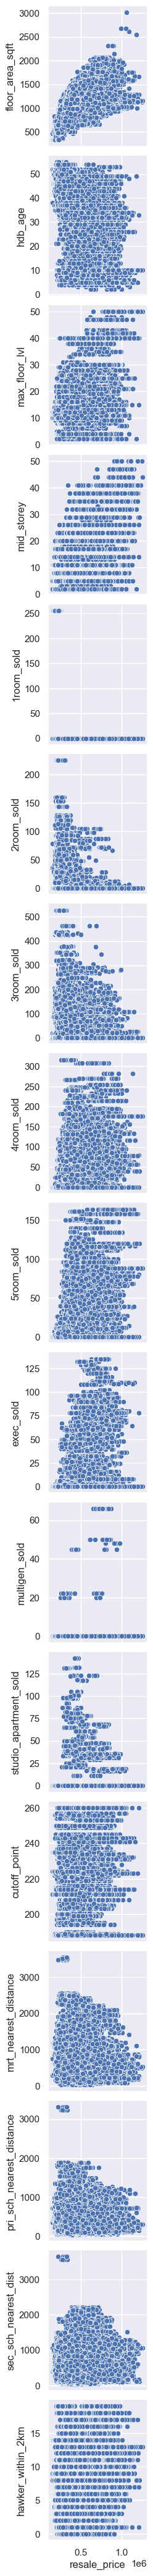

In [315]:
#features for pairplot 
y_vars = ['floor_area_sqft','hdb_age','max_floor_lvl',
          'mid_storey','1room_sold','2room_sold','3room_sold','4room_sold',
          '5room_sold','exec_sold','multigen_sold','studio_apartment_sold',
          'cutoff_point','mrt_nearest_distance','pri_sch_nearest_distance',
          'sec_sch_nearest_dist','hawker_within_2km']

x_vars = ['resale_price']

#create pairplot
sns.pairplot(df_train, x_vars=x_vars, y_vars=y_vars);

#### **2.4 EDA - Resale price and number of transaction over years**

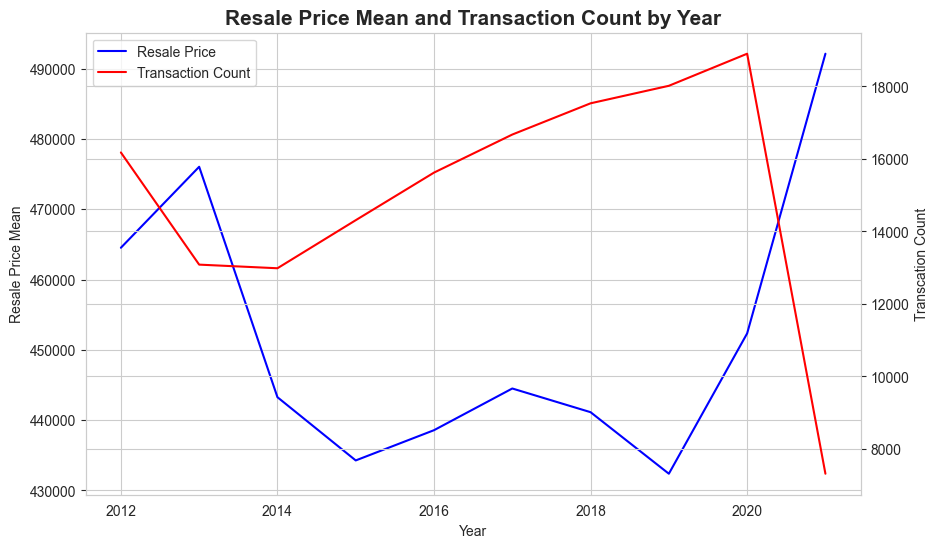

In [20]:
fig , ax1 = plt.subplots(figsize=(10,6));
sns.set_style('whitegrid')
ax2 = ax1.twinx()

#plot first line for resale price
line1 = ax1.plot(df_train.groupby('tranc_year')['resale_price'].mean(), color = 'b', label = 'Resale Price')

#plot second line for transaction count
line2 = ax2.plot(df_train.groupby('tranc_year')['resale_price'].count(), color = 'r', label = 'Transaction Count')

#set axis label
ax1.set_ylabel('Resale Price Mean');
ax1.set_xlabel('Year')
ax2.set_ylabel('Transcation Count');

#create legend
line = line1+line2
labs = [l.get_label() for l in line]
ax1.legend(line, labs, loc=0)

plt.title("Resale Price Mean and Transaction Count by Year", weight = 'bold', fontsize = 15);




The graph above shows that as the mean resale prices increase, there is a decreasing trend in the number of transactions.

#### **2.5 EDA - Mean resale price based on location**

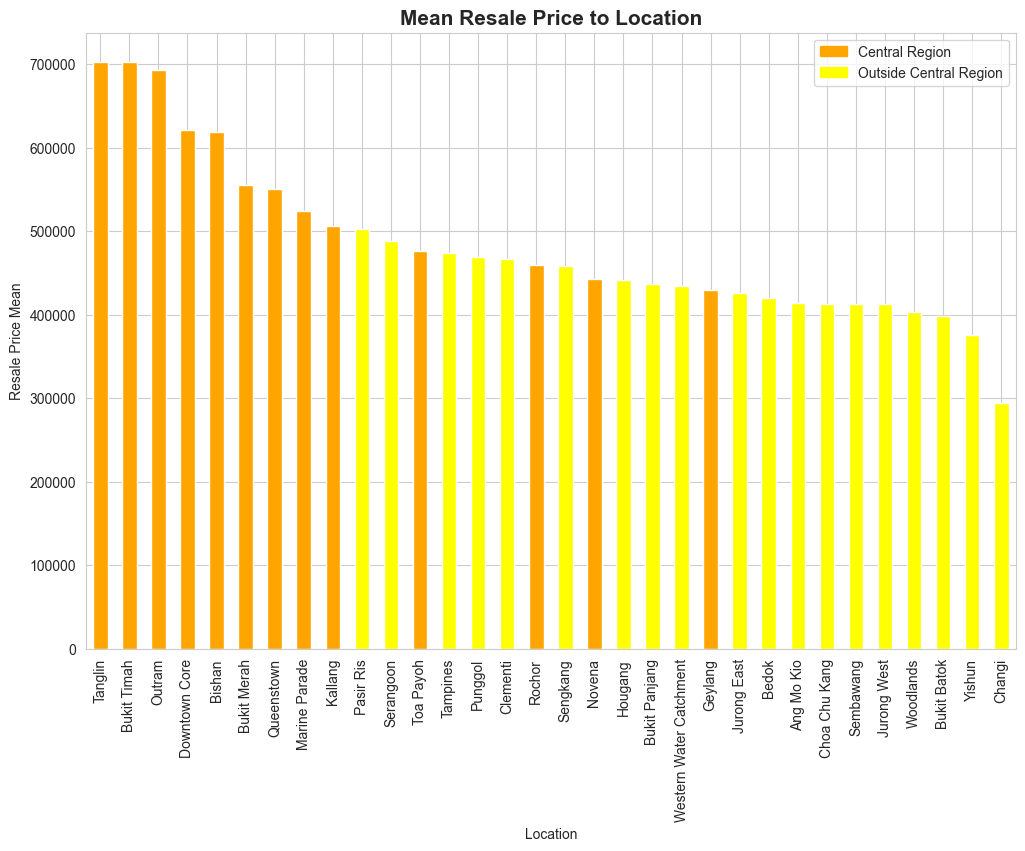

In [21]:
#create variable to group planning area and resale price
area_resale_price_sort = df_train.groupby('planning_area')['resale_price'].mean().sort_values(ascending=False).index

#plot graph
colors = ["orange" if i in cr else "yellow" for i in area_resale_price_sort]
resale_price_loc_plot = df_train.groupby('planning_area')['resale_price'].mean().sort_values(ascending=False).plot(kind='bar', color = colors, figsize = (12,8));
plt.ylabel('Resale Price Mean')
plt.xlabel('Location');
plt.title("Mean Resale Price to Location" , fontsize = 15,fontweight='bold');

#create legend
cr_patch = mpatches.Patch(color='orange', label = 'Central Region')
ocr_patch = mpatches.Patch(color='yellow', label = 'Outside Central Region')
plt.legend(handles = [cr_patch,ocr_patch]);

The graph shows that the top 9 locations with the highest resale prices are from the Central Region. This suggests that the Central Region tends to have higher resale prices compared to areas outside of the Central Region.

#### **2.6 EDA - Transaction count based on `planning_area`**

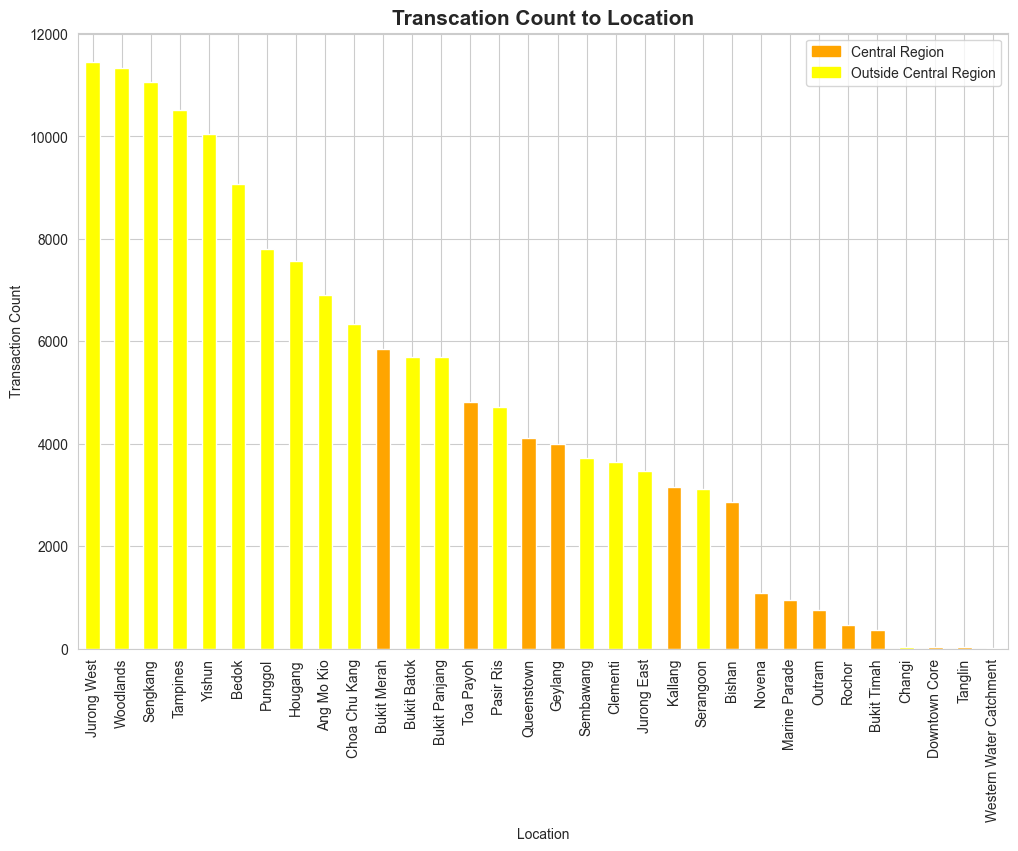

In [22]:
#create variable to group planning area and count
area_count_sort = df_train.groupby('planning_area')['resale_price'].count().sort_values(ascending=False).index

#plot graph
colors = ["orange" if i in cr else "yellow" for i in area_count_sort]
resale_price_loc_plot = df_train.groupby('planning_area')['resale_price'].count().sort_values(ascending=False).plot(kind='bar', color = colors, figsize = (12,8));
plt.ylabel('Transaction Count')
plt.xlabel('Location');
plt.title("Transcation Count to Location", fontsize = 15 ,fontweight='bold');

#create legend
cr_patch = mpatches.Patch(color='orange', label = 'Central Region')
ocr_patch = mpatches.Patch(color='yellow', label = 'Outside Central Region')
plt.legend(handles = [cr_patch,ocr_patch]);

The graph indicates that the locations with the highest transaction counts are predominantly outside the Central Region. In contrast to the previous graph, which shows that the Central Region tends to have higher resale prices, this suggests that transaction counts are higher outside the Central Region due to the lower prices in these areas.

#### **2.7 EDA - Top 3 Highest Corellations(`floor_area_sqft`, `max_floor_lvl`, `hdb_age`) to `resale_price`**

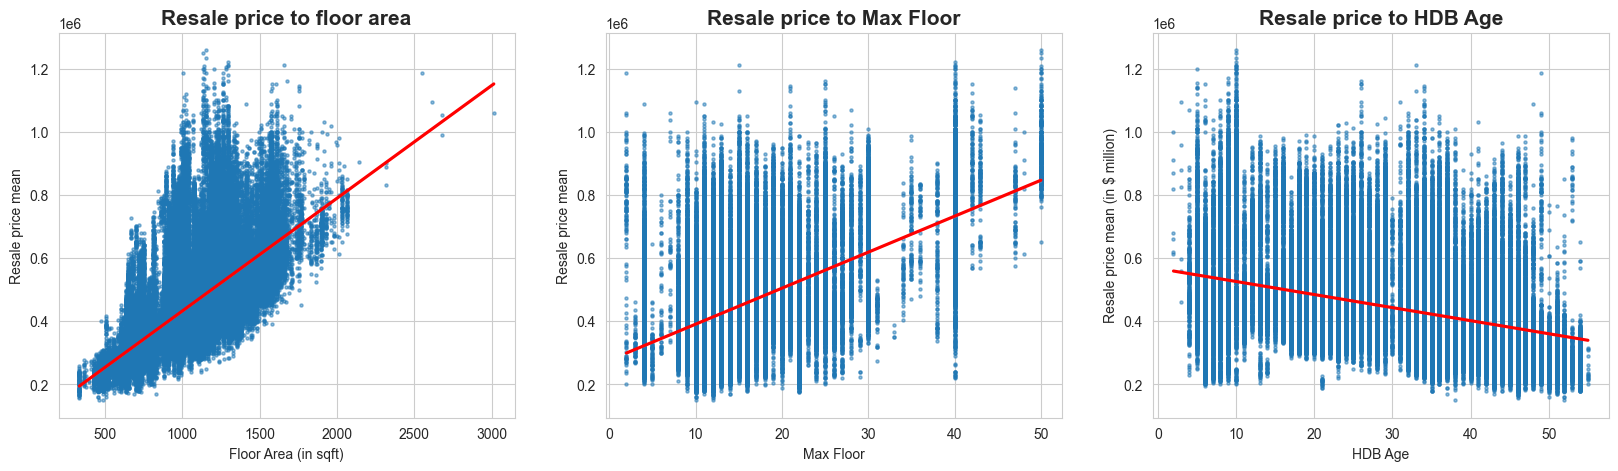

In [27]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

#create scatter plot between floor_area_sqft and resale_price
sns.regplot(x = 'floor_area_sqft', y = 'resale_price', data = df_train,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[0]);
ax[0].set_xlabel('Floor Area (in sqft)')
ax[0].set_title("Resale price to floor area", fontweight='bold', fontsize=15)
ax[0].set_ylabel('Resale price mean')

#create scatter plot between max_floor_lvl and resale_price
sns.regplot(x = 'max_floor_lvl', y = 'resale_price', data = df_train,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[1]);
ax[1].set_xlabel('Max Floor')
ax[1].set_title("Resale price to Max Floor", fontweight='bold', fontsize=15)
ax[1].set_ylabel('Resale price mean')

#create scatter plot between hdb_age and resale_price
sns.regplot(x = 'hdb_age', y = 'resale_price', data = df_train,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[2]);
ax[2].set_xlabel('HDB Age')
ax[2].set_title("Resale price to HDB Age", fontweight='bold', fontsize=15)
ax[2].set_ylabel('Resale price mean (in $ million)');

* Graph 1, Floor area and resale price mean have a positive correlation, as floor area increases, resale price mean tend to increase
* Graph 2, Max floor of HDB and resale price mean have a positive correlation, as max floor higher, resale price mean tends to be higher
* Graph 3, HDB age and resale price mean have a negative correlation, as HDB age increases, resale price mean tends to decrease

#### **2.8 EDA - Top 3 Highest Correlation Features(Central Region Only) to `resale price`**

In [50]:
#create grouping variable for central region only 
cr_only = df_train.loc[(df_train['region']==1),['region','hdb_age','resale_price','max_floor_lvl','floor_area_sqft']]

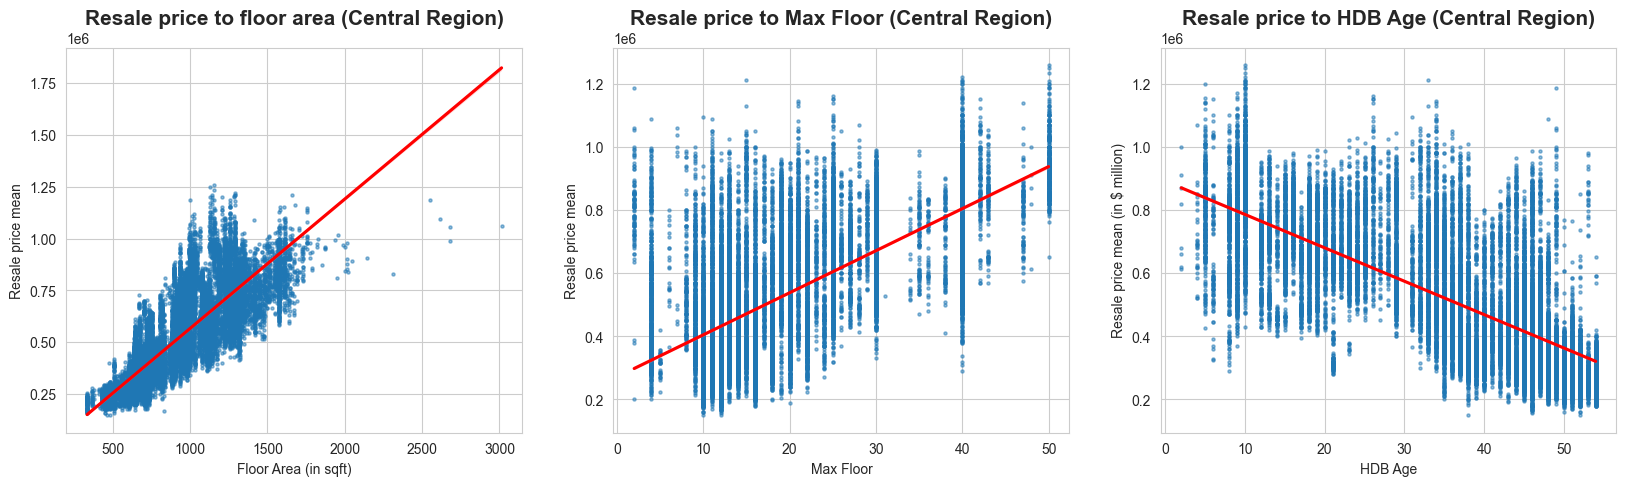

In [51]:
fig, ax = plt.subplots(1,3,figsize=(20,5));

#create scatter plot between floor_area_sqft and resale_price
sns.regplot(x = 'floor_area_sqft', y = 'resale_price', data = cr_only,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[0]);
ax[0].set_xlabel('Floor Area (in sqft)')
ax[0].set_title("Resale price to floor area (Central Region)", weight = 'bold', fontsize = 15)
ax[0].set_ylabel('Resale price mean')

#create scatter plot between max_floor_lvl and resale_price
sns.regplot(x = 'max_floor_lvl', y = 'resale_price', data = cr_only,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[1]);
ax[1].set_xlabel('Max Floor')
ax[1].set_title("Resale price to Max Floor (Central Region)", weight = 'bold', fontsize = 15)
ax[1].set_ylabel('Resale price mean')

#create scatter plot between hdb_age and resale_price
sns.regplot(x = 'hdb_age', y = 'resale_price', data = cr_only,scatter_kws={'alpha':0.5,'s':5},
            line_kws={'color':'red'}, ax = ax[2]);
ax[2].set_xlabel('HDB Age')
ax[2].set_title("Resale price to HDB Age (Central Region)", weight = 'bold', fontsize = 15)
ax[2].set_ylabel('Resale price mean (in $ million)');



The 3 graphs shows that for `central region`, it has even stronger correlation compared to outside central regions

#### **2.9 EDA - Nearest Transport Amenities between Central and Outside Central Region**

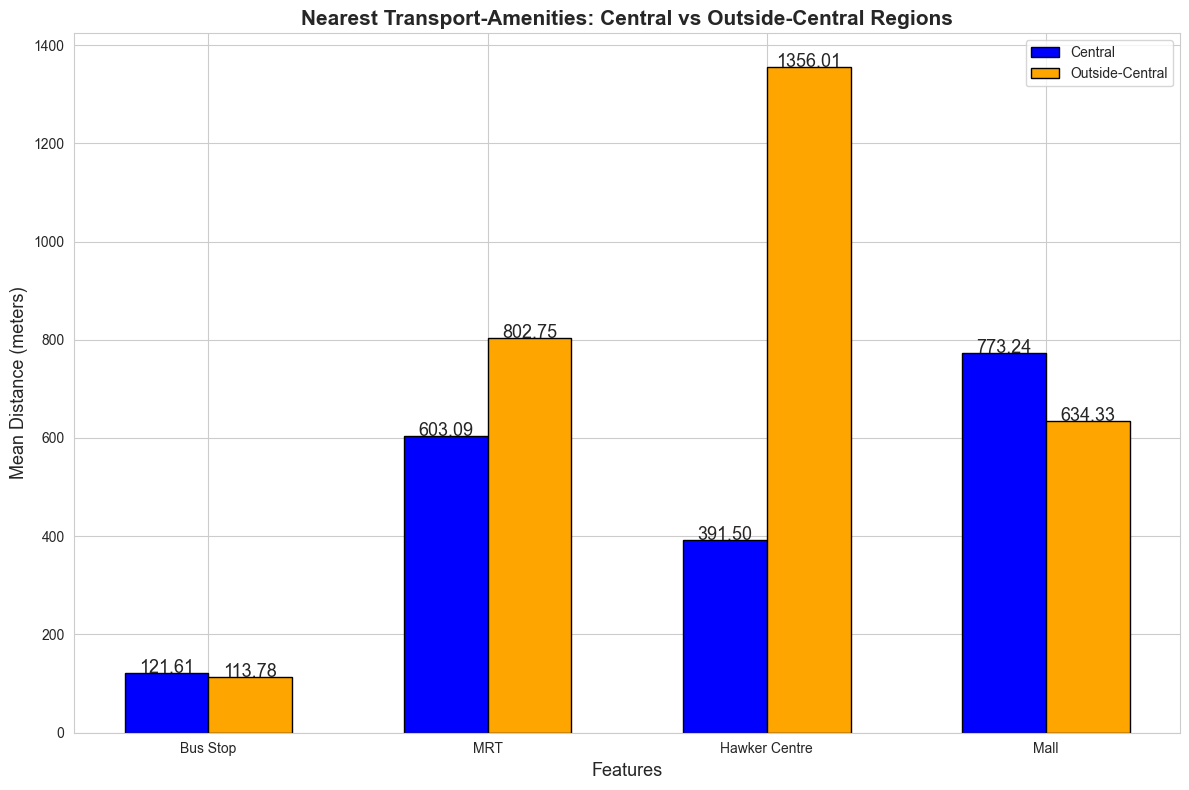

In [52]:
# Filter the DataFrame into Central and Non-Central Region towns
central_df = df_train[df_train['region'] == 1]
non_central_df = df_train[df_train['region'] == 0]

# Calculate the mean distances for each group
central_hawker_mean = central_df['hawker_nearest_distance'].mean()
central_mall_mean = central_df['mall_nearest_distance'].mean()
non_central_hawker_mean = non_central_df['hawker_nearest_distance'].mean()
non_central_mall_mean = non_central_df['mall_nearest_distance'].mean()
central_bus_mean = central_df['bus_stop_nearest_distance'].mean()
central_mrt_mean = central_df['mrt_nearest_distance'].mean()
non_central_bus_mean = non_central_df['bus_stop_nearest_distance'].mean()
non_central_mrt_mean = non_central_df['mrt_nearest_distance'].mean()

# Data for plotting - Assuming the mean calculations are already done as per your setup
categories = ['Bus Stop', 'MRT', 'Hawker Centre', 'Mall']
central_means = [central_bus_mean, central_mrt_mean, central_hawker_mean, central_mall_mean]
non_central_means = [non_central_bus_mean, non_central_mrt_mean, non_central_hawker_mean, non_central_mall_mean]

# Set the width of the bars
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(central_means))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(12, 8))
plt.bar(r1, central_means, color='blue', width=barWidth, edgecolor='black', label='Central')
plt.bar(r2, non_central_means, color='orange', width=barWidth, edgecolor='black', label='Outside-Central')

# Add xticks on the middle of the group bars
plt.xlabel('Features', fontsize=13)
plt.xticks([r + barWidth/2 for r in range(len(central_means))], categories)
plt.ylabel('Mean Distance (meters)', fontsize=13)
plt.title('Nearest Transport-Amenities: Central vs Outside-Central Regions', fontweight='bold', fontsize=15)

# Create legend & Show graphic
plt.legend()

# Annotating values on the bars for clarity
for i in range(len(central_means)):
    plt.text(r1[i], central_means[i], f'{central_means[i]:.2f}', ha='center', fontsize=13)
    plt.text(r2[i], non_central_means[i], f'{non_central_means[i]:.2f}', ha='center', fontsize=13)

plt.tight_layout()
plt.show()

Central region HDBs tend to have nearer mrt and hwaker center, where outside central region HDBs tend to have closer bus stop and malls

#### **2.10 EDA - Analysis on 5 Room HDB**

Since target client is looking for a 5 room hdb, we will analyze the trend of this hdb type on central and outside central region 

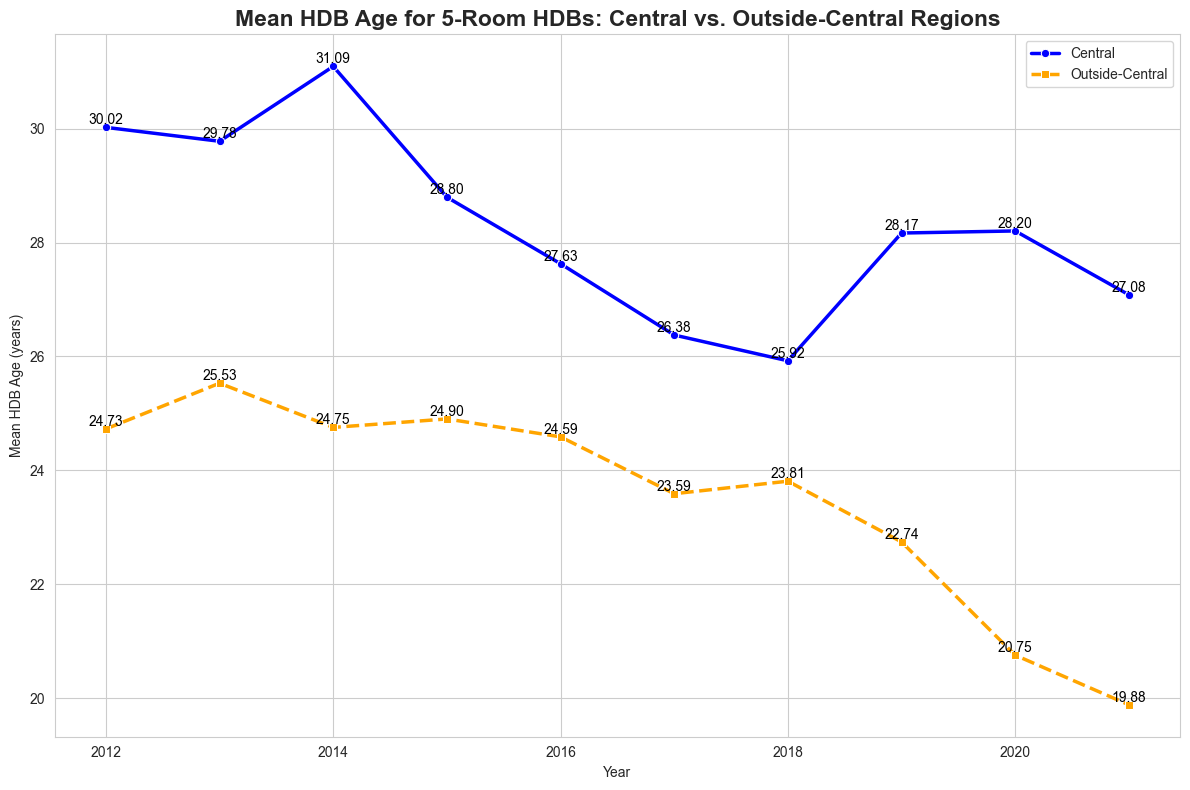

In [53]:
# Filter for 5-room HDBs
five_room_df = df_train[df_train['flat_type'] == '5 ROOM']

# Group by Region, Year, and calculate mean 'hdb_age'
mean_hdb_age = five_room_df.groupby(['region', 'tranc_year'])['hdb_age'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Separate the data for Central and Non-Central regions
central_data = mean_hdb_age[mean_hdb_age['region'] == 1]
non_central_data = mean_hdb_age[mean_hdb_age['region'] == 0]

# Plot Central region - blue circle for each plot point, thick line
sns.lineplot(data=central_data, x='tranc_year', y='hdb_age', 
             marker='o', color='blue', linewidth=2.5, label='Central')

# Plot Non-Central region - orange square for each plot point, thick dotted line
sns.lineplot(data=non_central_data, x='tranc_year', y='hdb_age', 
             marker='s', color='orange', linewidth=2.5, linestyle='--', label='Outside-Central')

# Adding plot title and labels
plt.title('Mean HDB Age for 5-Room HDBs: Central vs. Outside-Central Regions', fontsize=16.5, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mean HDB Age (years)')

# Adding value labels at each point for both Central and Non-Central
for i in range(central_data.shape[0]):
    plt.text(x=central_data['tranc_year'].iloc[i], y=central_data['hdb_age'].iloc[i],
             s=f"{central_data['hdb_age'].iloc[i]:.2f}", 
             color='black', ha='center', va='bottom')

for i in range(non_central_data.shape[0]):
    plt.text(x=non_central_data['tranc_year'].iloc[i], y=non_central_data['hdb_age'].iloc[i],
             s=f"{non_central_data['hdb_age'].iloc[i]:.2f}", 
             color='black', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

The graph shows that 5 room HDBs in central region has an average of 6 years older than outside central region HDBs.

#### **2.11 EDA - Analysis on 5 Room HDB Mean Floor Area for Central and Outside Central Region**

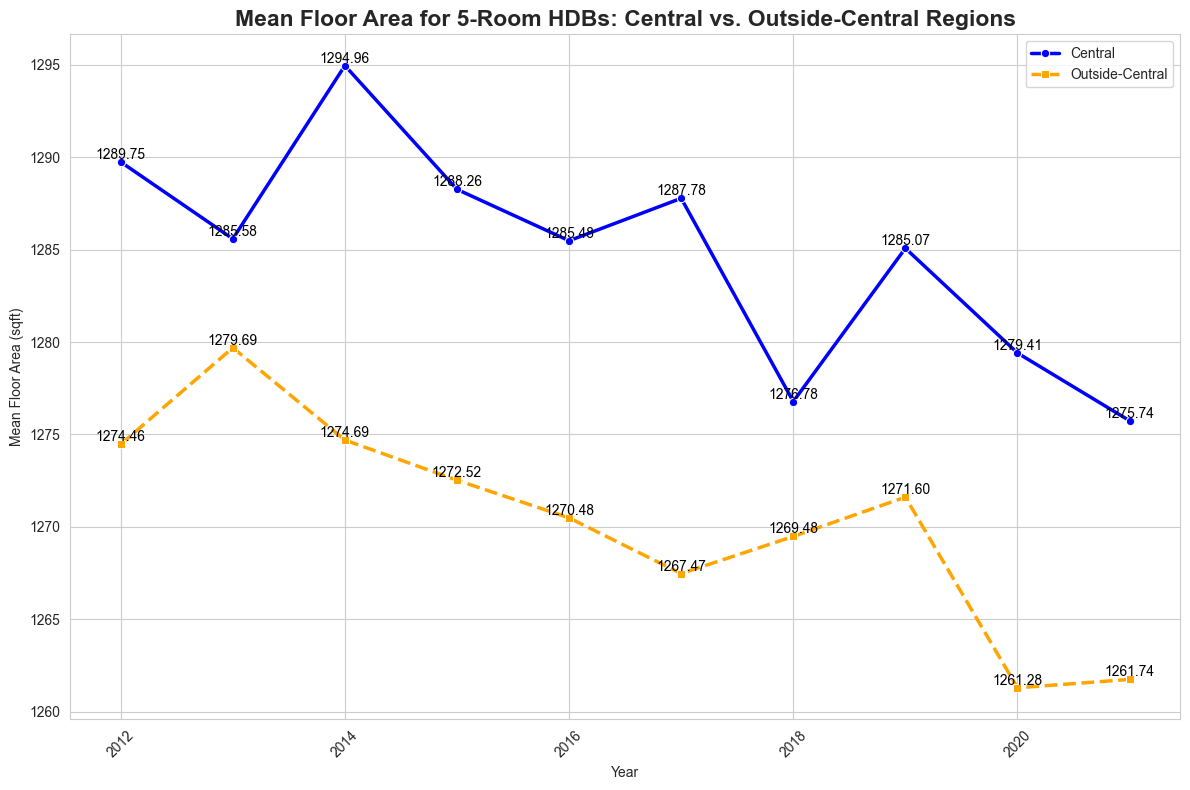

In [54]:
# Filter for 5-room HDBs
five_room_df = df_train[df_train['flat_type'] == '5 ROOM']

# Group by Region, Year, and calculate mean 'floor_area_sqft'
mean_floor_area = five_room_df.groupby(['region', 'tranc_year'])['floor_area_sqft'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Separate the data for Central and Non-Central regions
central_data = mean_floor_area[mean_floor_area['region'] == 1]
non_central_data = mean_floor_area[mean_floor_area['region'] == 0]

# Plot Central region - blue circle for each plot point, thick line
sns.lineplot(data=central_data, x='tranc_year', y='floor_area_sqft', 
             marker='o', color='blue', linewidth=2.5, label='Central')

# Plot Non-Central region - orange square for each plot point, thick dotted line
sns.lineplot(data=non_central_data, x='tranc_year', y='floor_area_sqft', 
             marker='s', color='orange', linewidth=2.5, linestyle='--', label='Outside-Central')

# Adding plot title and labels
plt.title('Mean Floor Area for 5-Room HDBs: Central vs. Outside-Central Regions', fontsize=16.5, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mean Floor Area (sqft)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding value labels at each point for both Central and Non-Central
for i in range(central_data.shape[0]):
    plt.text(x=central_data['tranc_year'].iloc[i], y=central_data['floor_area_sqft'].iloc[i],
             s=f"{central_data['floor_area_sqft'].iloc[i]:.2f}", 
             color='black', ha='center', va='bottom')

for i in range(non_central_data.shape[0]):
    plt.text(x=non_central_data['tranc_year'].iloc[i], y=non_central_data['floor_area_sqft'].iloc[i],
             s=f"{non_central_data['floor_area_sqft'].iloc[i]:.2f}", 
             color='black', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

The graph shows that floor area in central region tends to be larger compared to outside central region

### **3. Modelling**

These steps are taken to create the model:
1. Feature Selection
2. Feature Preparation (input x and output y)
3. Model Creation

---

#### **3.1 Feature Selection**

##### **3.1.1 Feature Filtration**

This part of notebook is to explain reason of dropping the following features before model creation:

|Dropped Feature|Justification|
|---|---|
|tranc_yearmonth, tranc_year, tranc_month|Datetime, it is not suitable to be used for modelling|
|lease_commence_date, year_completed|Redundant columns, can be represented as `hdb_age`|
|block, street_name, address, postal_code|Redundant for modelling, this model is based on planning area| 
|full_flat_type|combination of `flat_type` and `flat_model`
|storey_range, upper, mid, lower|Represented by mid_storey|
|floor_area_sqm|Same as `floor_area_sqft`|
|price_per_sqft|price should not be used to predict resale_price|
|residential|all column values is 1, no correlation identified|
|commercial|Irrelevant to modelling|
|total_dwelling_units|total units in a HDB, the model will use more detailed breakdown of quantity of 1 room, 2 room, 3 room, etc|
|1room_rental, 2room_rental, 3room_rental, other_room_rental|Irrelevant to predict resale_price|
|hawker_nearest_dist, hawker_within_500m, hawker_within_1km|analysis will focus on quantity of hawker within 2km, this covers for hawker within 500m and 1km|
|all latitude, longitude|Can be represented with nearest distance|
|mrt_name, bus_stop_name|Irrelevant to be modelled in this project|
|all mall columns|based on domain knowledge, malls should not have impact HDB price|
|market_hawker, multistorey_carpark, precint_pavilion, bus_interchange, mrt_interchange, bus_stop_nearest_distance, vacancy|has very minimum correlation to `resale_price`|


Based on the domain knowledge and correlation coefficient, below is the list of numerical features selected:

##### **3.1.2 Selected Features**

|Feature|Type|Remarks                             
|---|---|---|
|town|*integer*|Featured to: Mature estate = 1, non-mature estate = 0|
|floor_area_sqft|*float*|No changes from original dataset|
|hdb_age|*integer*|No changes from original dataset|
|max_floor_lvl|*integer*|No changes from original dataset|
|mid_storey|*integer*|No changes from original dataset|
|1room_sold|*integer*|No changes from original dataset|
|2room_sold|*integer*|No changes from original dataset|
|3room_sold|*integer*|No changes from original dataset|
|4room_sold|*integer*|No changes from original dataset|
|5room_sold|*integer*|No changes from original dataset|
|exec_sold|*integer*|No changes from original dataset|
|multigen_sold|*integer*|No changes from original dataset|
|studio_apartment_sold|*integer*|No changes from original dataset|
|cutoff_point|*integer*|No changes from original dataset|
|affiliation|*integer*|No changes from original dataset|
|sec_sch_name|*integer*|Featured to: Top secondary school = 1, other secondary school = 0|
|pri_sch_name|*integer*|Featured to: Top primary school = 1, other primary school = 0|
|mrt_nearest_distance|*float*|No changes from original dataset|
|pri_sch_nearest_distance|*float*|No changes from original dataset|
|sec_sch_nearest_dist|*float*|No changes from original dataset|
|hawker_within_2km|*float*|No changes from original dataset|
|region|*integer*|added feature to represent: Central Region = 1, Outside Central Region = 0|
|planning_area|*str*|No changes from original dataset|
|flat_type|*str*|No changes from original dataset|
|flat_model|*str*|No changes from original dataset|


In [15]:
#features list for modelling (numerical value)
features = ['town','floor_area_sqft','hdb_age','max_floor_lvl','mid_storey',
            '1room_sold','2room_sold','3room_sold','4room_sold','5room_sold',
            'exec_sold','multigen_sold','studio_apartment_sold','cutoff_point',
            'affiliation','sec_sch_name','pri_sch_name','mrt_nearest_distance',
            'pri_sch_nearest_distance','sec_sch_nearest_dist','hawker_within_2km'
            ,'region']

#### **3.2 Feature Preparation**

##### **3.2.1 Dummify Categorical Variable**

The variables are dummified to convert them from categorical variables into numerical values. These are the list of the categorical variables to be dummified: 
1. `planning_area`
2. `flat_type`
3. `flat_model`

In [16]:
#dummify planning area
planning_area_dummy = pd.get_dummies(df_train['planning_area'], drop_first=True, dtype= int)

#dummify flat model
flat_model_dummy = pd.get_dummies(df_train['flat_type'], drop_first = True, dtype = int)

#dummify flat model
flat_type_dummy = pd.get_dummies(df_train['flat_model'], drop_first = True, dtype = int)

##### **3.2.2 Define X and Y variables**

X represents the input features used to make predictions. X variables are the selected features above. y represents to target variables that the model is trying to predict. y variable is the `resale_price`

In [17]:
#define datasets for modelling
x_df = pd.concat([df_train[features],planning_area_dummy,flat_model_dummy,flat_type_dummy], axis = 1)

#define X and Y
X = x_df
y = df_train['resale_price']

##### **3.2.3 Train and Test Data Preparation**

Train-test split is to evaluate the performance of a machine learning model by training it on one subset of the data (training set) and testing it on a separate subset (test set). This helps to ensure that the model generalizes well to new, unseen data and prevents overfitting.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

##### **3.2.4 Standardscale Datasets**

Standardscaler is done to standardize features by removing the mean and scaling to unit variance, which helps ensure that each feature contributes equally to the model. For example in this project `floor_area_sqft` and `hdb_age`. Without scaling, the model may give more importance to the income variable due to its larger value range, but using StandardScaler will transform these variables to have a mean of 0 and a standard deviation of 1, ensuring fair contribution from both variables.

In [19]:
X_train.head(5)

town  floor_area_sqft  hdb_age  max_floor_lvl  mid_storey  1room_sold  \
11063      1          753.480       46             10           8           0   
66261      1         1119.456       29             16           5           0   
31602      0          990.288        6             16           5           0   
128678     0         1184.040       20             15          14           0   
16582      1          914.940       12             30          14           0   

        2room_sold  3room_sold  4room_sold  5room_sold  ...  Multi Generation  \
11063            0          86           0           2  ...                 0   
66261            0           0          67          17  ...                 0   
31602            0          45          45           0  ...                 0   
128678           0           0          28          74  ...                 0   
16582            3          42         116           0  ...                 0   

        New Generation  Premium Apartment  Premium Apartment Loft  \
11063                0                  0                       0   
66261                0                  0                       0   
31602                0                  1                       0   
128678               0                  0                       0   
16582                0                  0                       0   

        Premium Maisonette  Simplified  Standard  Terrace  Type S1  Type S2  
11063                    0           0         0        0        0        0  
66261                    0           0         0        0        0        0  
31602                    0           0         0        0        0        0  
128678                   0           0         0        0        0        0  
16582                    0           0         0        0        0        0  

[5 rows x 78 columns]

In [20]:
#instantiate scaling model
ss = StandardScaler()

#fit train model
ss.fit(X_train)

#transform X_train and X_test
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

#### **3.3 Model Creation**

We will be exploring the following machine learning model to create the predictive model: 
1. Linear Regression
2. Linear Regression with Regularization L2 (Ridge)
3. Linear Regression with Regularization L1 (Lasso)

---

##### **3.3.1 Linear Regression**

In [65]:
#instantiate model
lr = LinearRegression()

In [66]:
#fit model
lr.fit(X_train_ss,y_train)
lr_preds_train = lr.predict(X_train_ss)
lr_preds_test = lr.predict(X_test_ss)

In [67]:
# check cross_val_score generated 
print(f'Linear Regression cross_val_score on train : {cross_val_score(lr, X_train_ss, y_train, cv=5).mean()}')
print(f'Linear Regression cross_val_score on test: {cross_val_score(lr, X_test_ss, y_test, cv=5).mean()}')

Linear Regression cross_val_score on train : 0.873324652721527
Linear Regression cross_val_score on test: -7.352859893694031e+23


*Cross value score between train and test model has a significant difference, model is overfitted*

In [69]:
print(f"The model train R_square score is: {metrics.r2_score(y_train,lr_preds_train)}")
print(f"The model train mean absolute percentage error score is: {metrics.mean_absolute_percentage_error(y_train,lr_preds_train)}")
print(f"The model train root mean squared error score is: {metrics.mean_squared_error(y_train,lr_preds_train)**(1/2)}")

The model train R_square score is: 0.8735285573820324
The model train mean absolute percentage error score is: 0.09404322036407906
The model train root mean squared error score is: 50893.75393178653


In [71]:
print(f"The model train R_square score is: {metrics.r2_score(y_test,lr_preds_test)}")
print(f"The model train mean absolute percentage error score is: {metrics.mean_absolute_percentage_error(y_test,lr_preds_test)}")
print(f"The model train root mean squared error score is: {metrics.mean_squared_error(y_test,lr_preds_test)**(1/2)}")

The model train R_square score is: 0.8723292340415058
The model train mean absolute percentage error score is: 0.09511746349353403
The model train root mean squared error score is: 51486.13534376536


             Column_Name  Coefficient_Value
55                4 ROOM       3.194929e+17
54                3 ROOM       2.853927e+17
56                5 ROOM       2.782497e+17
57             EXECUTIVE       1.762423e+17
14           affiliation       1.749103e+17
..                   ...                ...
17  mrt_nearest_distance      -2.532439e+04
2                hdb_age      -4.078700e+04
68      Multi Generation      -3.667982e+16
21                region      -1.265171e+17
15          sec_sch_name      -1.749103e+17

[78 rows x 2 columns]


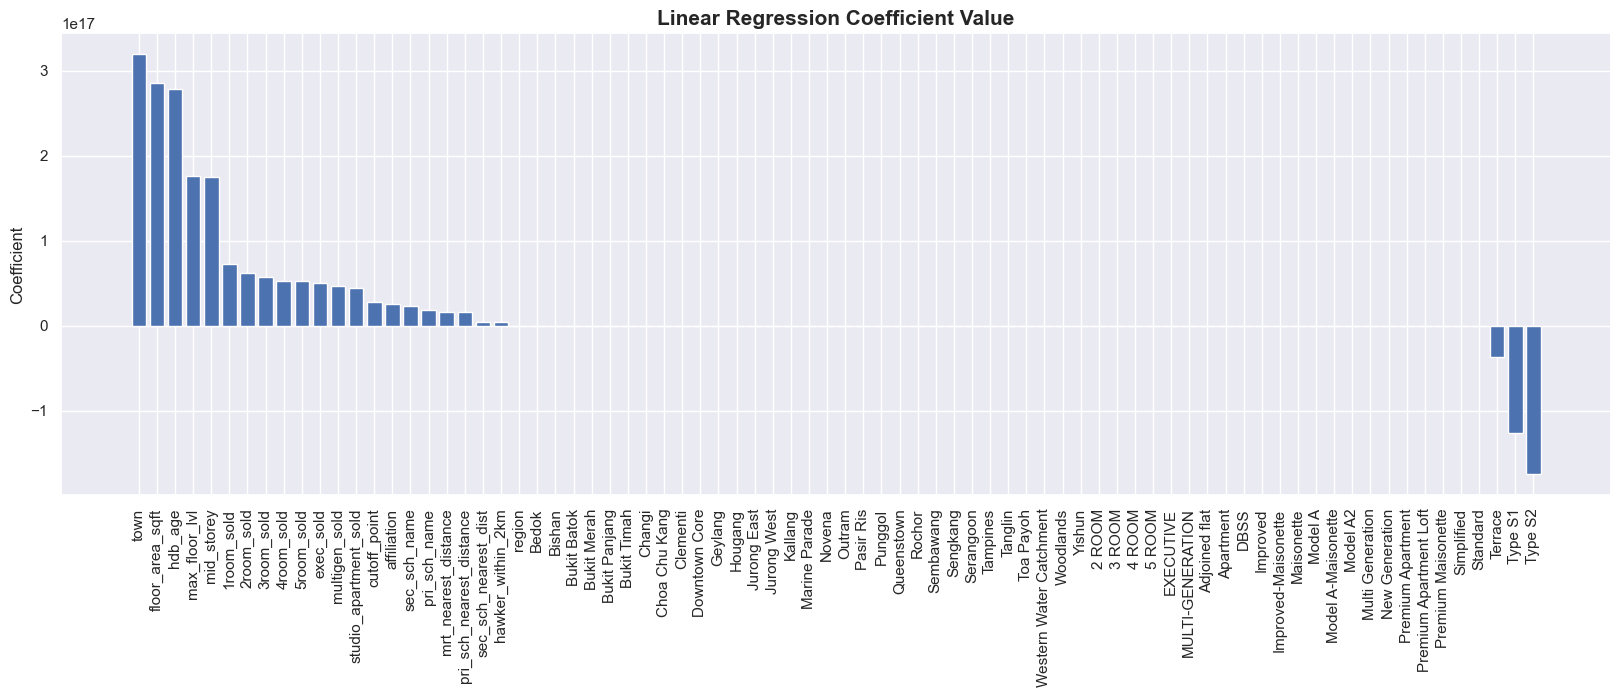

In [72]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(lr.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df.sort_values(by = 'Coefficient_Value', ascending=False))

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (20,6);
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'].sort_values(ascending=False));
plt.xticks(rotation= 90);
plt.ylabel('Coefficient')
plt.title('Linear Regression Coefficient Value', weight = 'bold', fontsize = 15);
sns.set_theme()

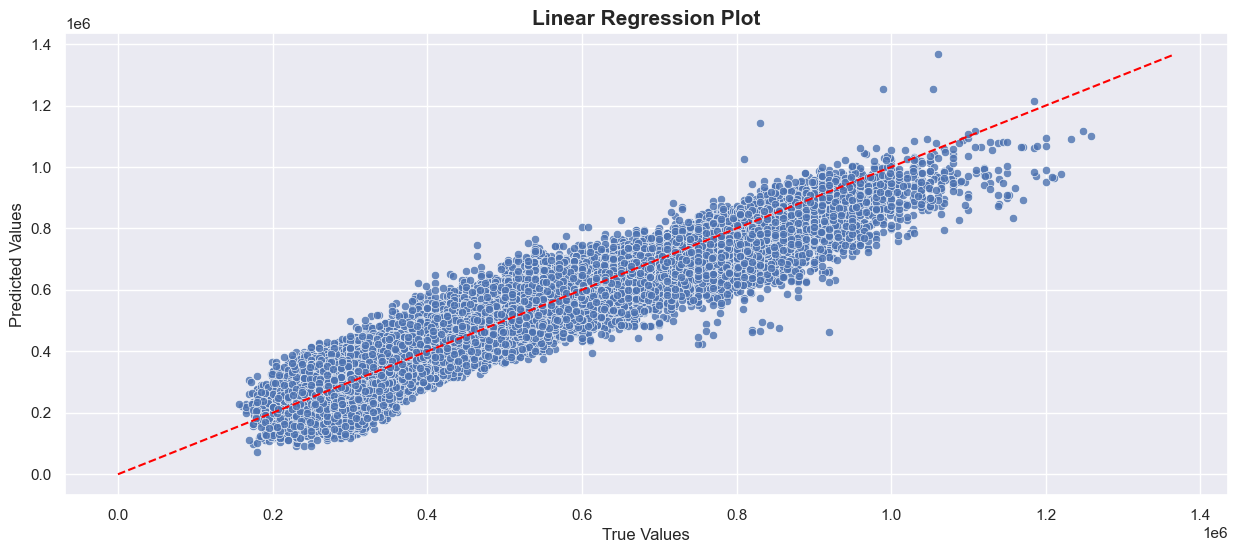

In [73]:
#plot linear regression model 
plt.figure(figsize=(15,6))
sns.set_theme()
sns.scatterplot(x = y_train, y = lr_preds_train, alpha = 0.8)
plt.ylabel("Actual Resale Price")
plt.xlabel("Predicted Resale Price")
plt.title("Linear Regression Model");

#create perfect regression line reference
plt.plot([0, max(max(y_test),max(lr_preds_train))],
         [0, max(max(y_test),max(lr_preds_train))],
         linestyle = '--', color = 'red')

plt.title('Linear Regression Plot', fontsize = 15, weight = 'bold')
plt.xlabel('True Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12);


##### **3.3.2 Linear Regression with Regularization Ridge**

Ridge regularization, also known as L2 regularization, adds a penalty term to the loss function of a linear regression model proportional to the square of the magnitude of the coefficients. This helps to prevent overfitting by discouraging the model from assigning too much importance to any one feature.

In [31]:
#instantiate Ridge model
ridge = RidgeCV(np.linspace(1,5,100))

In [32]:
#fit to ridge model 
ridge.fit(X_train_ss,y_train)

RidgeCV(alphas=array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.212121...
       3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989899,
       4.03030303, 4.07070707, 4.11111111, 4.15151515, 4.19191919,
       4.23232323, 4.27272727, 4.31313131, 4.35353535, 4.39393939,
       4.43434343, 4.47474747, 4.51515152, 4.55555556, 4.5959596 ,
       4.63636364, 4.67676768, 4.71717172, 4.75757576, 4.7979798 ,
       4.83838384, 4.87878788, 4.91919192, 4.95959596, 5.        ]))

In [33]:
print(f'Ridge Regression cross_val_score on train : {cross_val_score(ridge, X_train_ss, y_train, cv=5).mean()}')
print(f'Ridge Regression cross_val_score on test: {cross_val_score(ridge, X_test_ss, y_test, cv=5).mean()}')

Ridge Regression cross_val_score on train : 0.8733312669581295
Ridge Regression cross_val_score on test: 0.8720581866376425


Cross validation scores are similar for both test and train sets. This model is likely to predict well on the unseen data

In [58]:
#create prediction variable 
ridge_preds_train = ridge.predict(X_train_ss)
ridge_preds_test = ridge.predict(X_test_ss)

In [57]:
print(f"The model train R_square value is: {metrics.r2_score(y_train,ridge_preds_train)}")
print(f"The model train mean absolute percentage error score is: {metrics.mean_absolute_percentage_error(y_train,ridge_preds_train)}")
print(f"The model train mean squared error score is: {metrics.mean_squared_error(y_train,ridge_preds_train)**(1/2)}")

The model train R_square value is: 0.8735628553184676
The model train mean absolute percentage error score is: 0.09404605720489997
The model train mean squared error score is: 50886.85249592996


In [60]:
print(f"The model test R_square value is: {metrics.r2_score(y_test,ridge_preds_test)}")
print(f"The model test mean absolute percentage error score is: {metrics.mean_absolute_percentage_error(y_test,ridge_preds_test)}")
print(f"The model test mean squared error score is: {metrics.mean_squared_error(y_test,ridge_preds_test)**(1/2)}")

The model test R_square value is: 0.8723491447782044
The model test mean absolute percentage error score is: 0.09512185266143952
The model test mean squared error score is: 51482.12045888556


             Column_Name  Coefficient_Value
1        floor_area_sqft       80420.921531
0                   town       66413.025954
20     hawker_within_2km       36125.902724
33               Hougang       31443.529902
45              Sengkang       29743.201392
..                   ...                ...
62              Improved       -8344.552875
54                3 ROOM       -8603.594528
7             3room_sold       -8878.558024
17  mrt_nearest_distance      -25221.349088
2                hdb_age      -40825.222204

[78 rows x 2 columns]


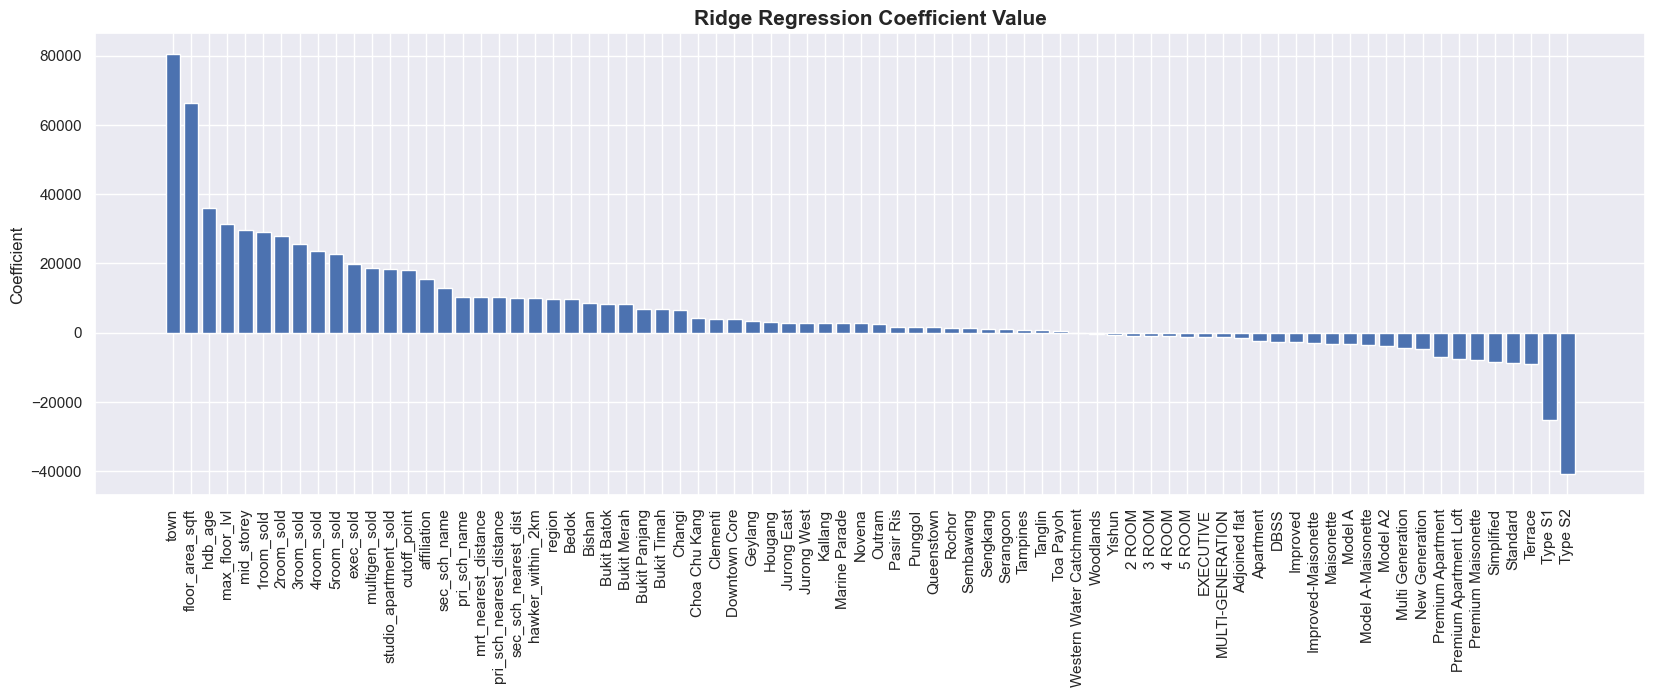

In [48]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(ridge.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df.sort_values(by= 'Coefficient_Value', ascending=False))

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (20,6);
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'].sort_values(ascending=False));
plt.xticks(rotation= 90);
plt.ylabel('Coefficient');
plt.title('Ridge Regression Coefficient Value', weight = 'bold', fontsize = 15);

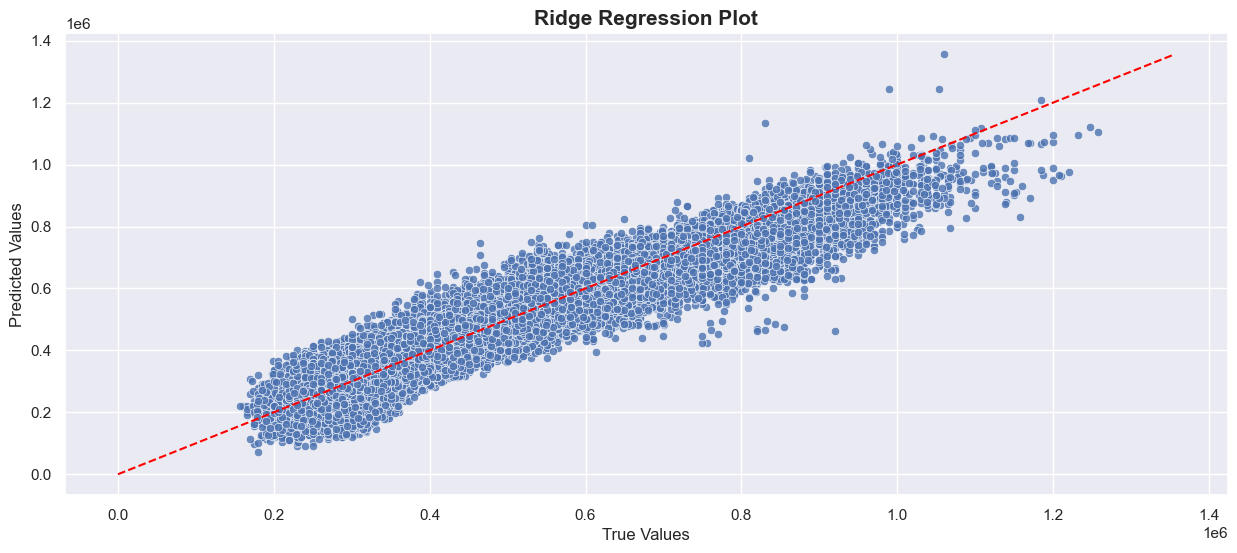

In [74]:
#plot ridge model 
plt.figure(figsize= (15,6))
sns.set_theme()
sns.scatterplot(x = y_train, y = ridge_preds_train, alpha = 0.8)
plt.ylabel("Actual Resale Price")
plt.xlabel("Predicted Resale Price")
plt.title("Ridge Regression Model");

#create perfect regression line reference
#create perfect regression line reference
plt.plot([0, max(max(y_test),max(ridge_preds_train))],
         [0, max(max(y_test),max(ridge_preds_train))],
         linestyle = '--', color = 'red')

plt.title('Ridge Regression Plot', fontsize = 15, weight = 'bold')
plt.xlabel('True Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12);

##### **3.3.3 Linear Regression with Regularization Lasso**

Lasso regularization, also known as L1 regularization, adds a penalty term to the loss function of a linear regression model proportional to the absolute value of the coefficients. This encourages sparsity in the model by shrinking some coefficients to exactly zero, effectively performing feature selection.

In [39]:
#instantiate model 
lasso = LassoCV(n_alphas=100)

In [40]:
print(f'Lasso Regression cross_val_score on train : {cross_val_score(lasso, X_train_ss, y_train, cv=5).mean()}')
print(f'Lasso Regression cross_val_score on test: {cross_val_score(lasso, X_test_ss, y_test, cv=5).mean()}')

Lasso Regression cross_val_score on train : 0.8729495021815904
Lasso Regression cross_val_score on test: 0.8716905233764679


Cross validation scores are similar for both training and test sets. This model is likely to predict well on the unseen data.

In [41]:
#fit lasso model
lasso.fit(X_train_ss, y_train)

LassoCV()

In [75]:
lasso_preds_train = lasso.predict(X_train_ss)
lasso_preds_test = lasso.predict(X_test_ss)

In [76]:
print(f"The model train R_square score is: {metrics.r2_score(y_train,lasso_preds_train)}")
print(f"The model train mean absolute percentage error score is: {metrics.mean_absolute_percentage_error(y_train,lasso_preds_train)}")
print(f"The model train mean squared error score is: {metrics.mean_squared_error(y_train,lasso_preds_train)**(1/2)}")

The model r_square value is: 0.873179764592582
The model mean absolute percentage error is: 0.09415840196776898
The model mean squared error is: 50963.88499003011


In [77]:
print(f"The model test r_square score is: {metrics.r2_score(y_test,lasso_preds_test)}")
print(f"The model test mean absolute percentage error score is: {metrics.mean_absolute_percentage_error(y_test,lasso_preds_test)}")
print(f"The model test mean squared error score is: {metrics.mean_squared_error(y_test,lasso_preds_test)**(1/2)}")

The model test r_square score is: 0.8719760929901288
The model test mean absolute percentage error score is: 0.09518323183103601
The model test mean squared error score is: 51557.29224603205


             Column_Name  Coefficient_Value
1        floor_area_sqft       81927.373940
20     hawker_within_2km       33960.492303
3          max_floor_lvl       23265.614853
4             mid_storey       18583.708713
37         Marine Parade       17353.874419
..                   ...                ...
29         Choa Chu Kang       -9856.437021
44             Sembawang      -10689.972195
51             Woodlands      -14107.660164
17  mrt_nearest_distance      -25062.683839
2                hdb_age      -40811.180294

[78 rows x 2 columns]


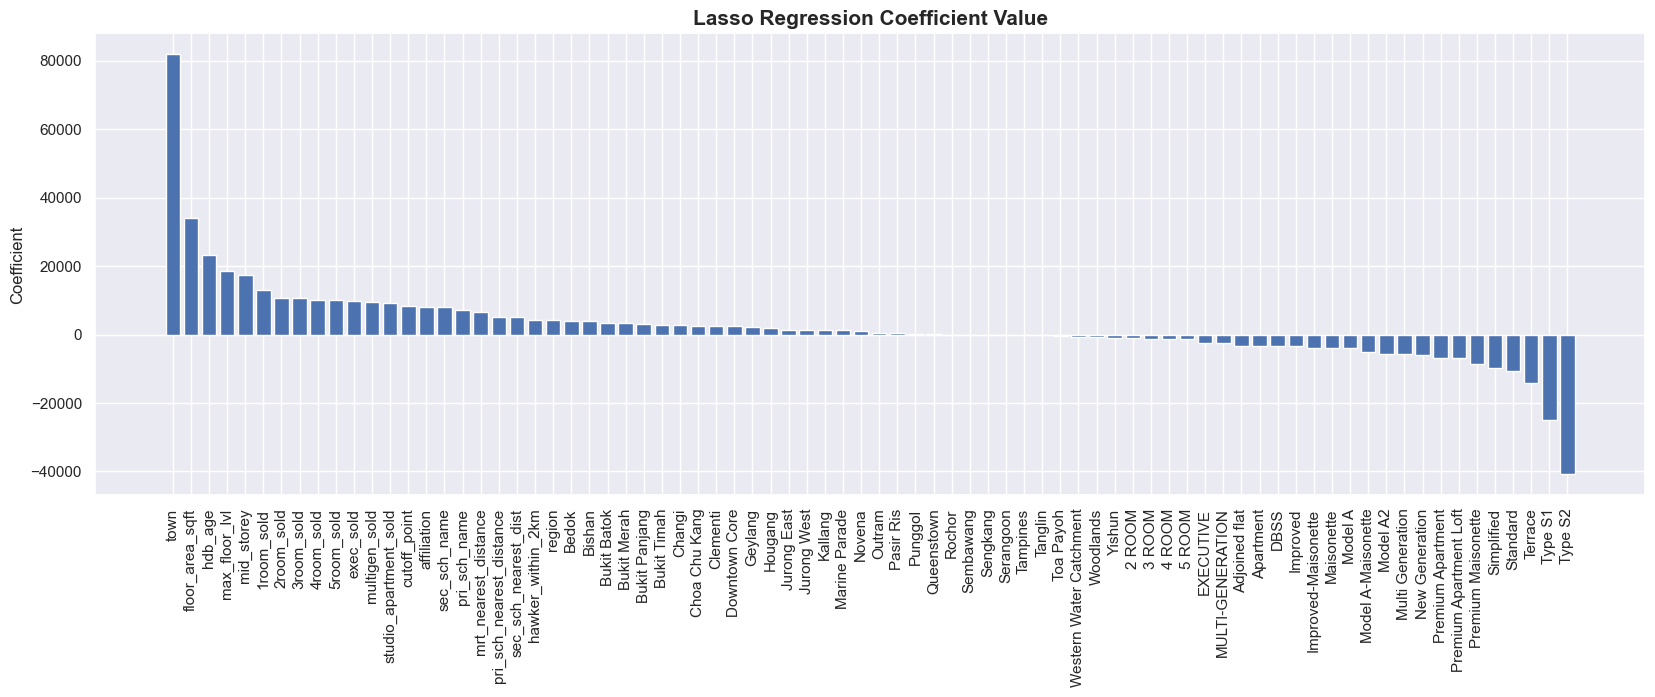

In [46]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(lasso.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df.sort_values(by = 'Coefficient_Value', ascending=False))

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (20,6);
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'].sort_values(ascending = False));
plt.xticks(rotation= 90);
plt.ylabel('Coefficient');
plt.title('Lasso Regression Coefficient Value', weight = 'bold', fontsize = 15);

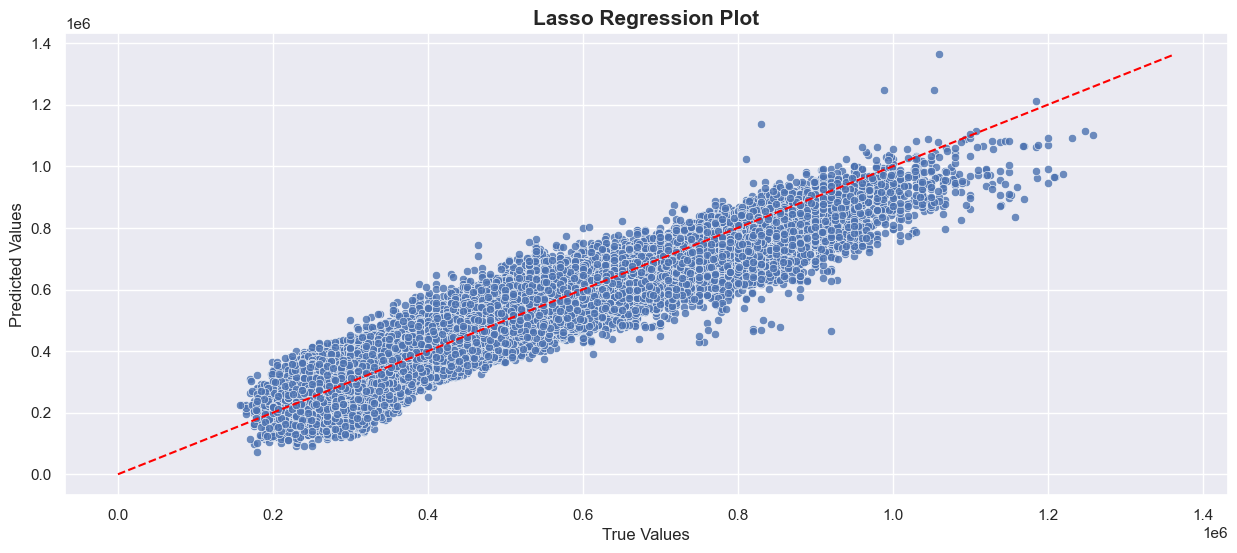

In [56]:
#plot lasso model 
plt.figure(figsize= (15,6))
sns.set_theme()
sns.scatterplot(x = y_train, y = lasso_preds_train, alpha = 0.8)
plt.ylabel("Actual Resale Price")
plt.xlabel("Predicted Resale Price")
plt.title("Lasso Regression Model");

#create perfect regression line reference
plt.plot([0, max(max(y_test),max(lasso_preds_train))],
         [0, max(max(y_test),max(lasso_preds_train))],
         linestyle = '--', color = 'red')

plt.title('Lasso Regression Plot', fontsize = 15, weight = 'bold')
plt.xlabel('True Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12);


**Summary of scores**

Cross Validation Score

|Model|Train Score|Test Score|
|---|---|---|
|Linear Regression|0.873|-7.352e+23|
|Ridge Regression|0.873|0.872|
|Lasso Regression|0.872|0.871|



Comparing the three model, ridge has higher cross_val_score and the model fits. Therefore, `Linear Regression with Regularization Ridge` model is used to predict the test datasets resale price.
- Coefficient of determination, R² score: 0.87
- Mean absolute percentage error, MAPE score: 9.4%

### **Kaggle Submission**

In [350]:
df_test.head()

id tranc_yearmonth  town flat_type block          street_name  \
0  114982         2012-11     0    4 ROOM   173         YISHUN AVE 7   
1   95653         2019-08     0    5 ROOM  986C    JURONG WEST ST 93   
2   40303         2013-10     1    3 ROOM   534    ANG MO KIO AVE 10   
3  109506         2017-10     0    4 ROOM    29         MARSILING DR   
4  100149         2016-08     0    4 ROOM   170  BT BATOK WEST AVE 8   

  storey_range  floor_area_sqm         flat_model  lease_commence_date  ...  \
0     07 TO 09            84.0         Simplified                 1987  ...   
1     04 TO 06           112.0  Premium Apartment                 2008  ...   
2     07 TO 09            68.0     New Generation                 1980  ...   
3     01 TO 03            97.0     New Generation                 1979  ...   
4     16 TO 18           103.0            Model A                 1985  ...   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    0          1.433681         103.832924   
1                    0          1.339244         103.698896   
2                    0          1.371893         103.851811   
3                    0          1.434423         103.773698   
4                    0          1.349195         103.741000   

   sec_sch_nearest_dist  sec_sch_name  cutoff_point affiliation  \
0            156.322353             0           218           0   
1            739.371688             0           199           0   
2            305.071191             0           245           0   
3            433.454591             0           188           0   
4            217.295361             0           223           0   

  sec_sch_latitude  sec_sch_longitude  region  
0         1.436235         103.829987       0  
1         1.335256         103.702098       0  
2         1.374242         103.851430       0  
3         1.439183         103.774499       0  
4         1.348351         103.740873       0  

[5 rows x 78 columns]

**Dummify Test Variable**

In [351]:
test_planning_area_dummy = pd.get_dummies(df_test['planning_area'], drop_first=True, dtype= int)

#dummify flat model
test_flat_model_dummy = pd.get_dummies(df_test['flat_type'], drop_first = True, dtype = int)

#dummify flat model
test_flat_type_dummy = pd.get_dummies(df_test['flat_model'], drop_first = True, dtype = int)

In [352]:
x_test_df = pd.concat([df_test[features],test_planning_area_dummy,test_flat_type_dummy,test_flat_model_dummy],axis =1)

**Check number of columns between kaggle train and test model**

In [353]:
X.shape

(150634, 78)

In [354]:
x_test_df.shape

(16737, 77)

*One column is missing on test model*

**Add missing column to kaggle test datasets and re-arrange**

In [355]:
#identify missing columns:
missing = []
for name in X.columns:
    if name not in x_test_df:
        missing.append(name)

In [356]:
#add to test dataframe 

x_test_df[missing] = 0

In [357]:
#re-arrange test column based on train test column
x_test_df = x_test_df[X.columns]

**Scaling of test features**

In [358]:
#define X for kaggle
kaggle_X_test = x_test_df
#apply scaling
kaggle_X_test_ss = ss.transform(kaggle_X_test)

**Predict kaggle test with ridge model**

In [359]:
#predict test resale prices
kaggle_y_pred = ridge.predict(kaggle_X_test_ss)

**Create csv file for kaggle submission**

In [360]:
#create dataframe for kaggle_y_pred
df_kaggle_y_pred = pd.DataFrame(kaggle_y_pred, columns=['Predicted'] )

In [361]:
#create csv file for kaggle submssion
df_kaggle_csv = pd.concat([df_test['id'],df_kaggle_y_pred],axis=1)

In [362]:
#rename Id based on kaggle requirement
df_kaggle_csv = df_kaggle_csv.rename(columns={'id':'Id'})

In [363]:
df_kaggle_csv

Id      Predicted
0      114982  337320.574145
1       95653  522952.241557
2       40303  344527.338973
3      109506  286539.998147
4      100149  457762.157210
...       ...            ...
16732   23347  352622.973480
16733   54003  513245.371439
16734  128921  417384.278240
16735   69352  490349.171089
16736  146210  325125.742298

[16737 rows x 2 columns]

**Export kaggle csv file**

In [364]:
# commented out to prevent unintentional export when running the whole notebook 
# df_kaggle_csv.to_csv('../kaggle/kaggle-sub.csv', index = False)

**Kaggle Submission Screenshot**

![Kaggle](../kaggle/kaggle-submission.png)

### **Conclusion**

Key Insights: 
- Yes, resale prices of central region HDBs seem to be influenced primarily by its location.
- Secondarily, buyers may be drawn to the generally larger floor areas of central HDBs. However, this may also be found in non-central mature estates.
- Other factors such as proximity to top schools, malls, hawker centres and connectivity via public transport don’t seem to affect resale prices in the central region as much.

Recommendation to Client:
- Client may consider towns that border the central region
    - More budget-friendly (resale price generally below $500k)
    - Towns such as Serangoon and Ang Mo Kio also offer good public transport connectivity
        - Serangoon has a bus and an MRT interchange
        - AMK has a bus interchange, and is one MRT stop away from an MRT interchange (Bishan)

Future Recommendation for Modelling:

|Model Limitation| Possible Solutions|
|---|---|
|Latest transactions in the dataset took place in 2021|Include transactions till 2023 to reflect the latest resale prices|
Improved infrastructure such as new MRT lines and URA urban planning within certain towns may affect resale prices|Include “developing_towns” as an additional feature in dataset|
Transaction volume alone may not be a sufficient indicator of supply & demand|Include “time_taken_to_sell” as an additional feature in dataset 

### **Prediction Test with PropertyGuru Listing**

Part 1: Outside Central Region

Location: [Tampines](https://www.propertyguru.com.sg/listing/hdb-for-sale-317-tampines-street-33-24973777)

In [365]:
#define property values 
property_dict = {'town' : 1 ,
                'floor_area_sqft': 1152,
                'hdb_age': 29,
                'max_floor_lvl' : 10,
                'mid_storey': 2,
                '1room_sold': 0,
                '2room_sold': 0,
                '3room_sold': 0 ,
                '4room_sold': 45,
                '5room_sold': 45,
                'exec_sold': 0,
                'multigen_sold' : 0 ,
                'studio_apartment_sold' : 0,
                'cutoff_point': 237,
                'affiliation': 0,
                'sec_sch_name': 0,
                'pri_sch_name': 0,
                'mrt_nearest_distance': 410,
                'pri_sch_nearest_distance': 770,
                'sec_sch_nearest_dist': 770,
                'hawker_within_2km': 2,
                'region': 0,
                'planning_area' : 'Tampines',
                'flat_type': '4 ROOM',
                'flat_model': 'New Generation'}

In [366]:
#create prediction dataframe 
df_property = pd.DataFrame([property_dict])

In [367]:
#dummify variable
df_property = pd.get_dummies(df_property, prefix='', prefix_sep='', dtype = int)

In [368]:
#fill in missing column, since fit and test model have different number of columns 
missing = []
for name in X.columns:
    if name not in df_property.columns:
        missing.append(name)

df_property[missing] = 0

df_property = df_property[X.columns]

In [369]:
#define X 
X_property = df_property
#scale varialble
X_property_ss = ss.transform(X_property)

In [370]:
prop_pred = ridge.predict(X_property_ss)

In [371]:
prop_pred

array([485620.76329842])

Pred 2: 

[Bishan](https://www.propertyguru.com.sg/listing/hdb-for-sale-229-bishan-street-23-24964263)

In [372]:
property_dict2 = {'town' : 1 ,
                'floor_area_sqft': 1097,
                'hdb_age': 32,
                'max_floor_lvl' : 18,
                'mid_storey': 9,
                '1room_sold': 0,
                '2room_sold': 0,
                '3room_sold': 0 ,
                '4room_sold': 108,
                '5room_sold': 10,
                'exec_sold': 0,
                'multigen_sold' : 0 ,
                'studio_apartment_sold' : 0,
                'cutoff_point': 253,
                'affiliation': 1,
                'sec_sch_name': 1,
                'pri_sch_name': 1,
                'mrt_nearest_distance': 810,
                'pri_sch_nearest_distance': 560,
                'sec_sch_nearest_dist': 560,
                'hawker_within_2km': 8,
                'region': 1,
                'planning_area' : 'Bishan',
                'flat_type': '4 ROOM',
                'flat_model': 'Model A'}

In [373]:
#create dataframe
df_property2 = pd.DataFrame([property_dict2])

In [374]:
#dummify variable
df_property2 = pd.get_dummies(df_property2, prefix='', prefix_sep='', dtype = int)

In [375]:
#fill in missing column, since fit and test model have different number of columns 
missing = []
for name in X.columns:
    if name not in df_property2.columns:
        missing.append(name)

df_property2[missing] = 0

df_property2 = df_property2[X.columns]

In [376]:
#define X 
X_property2 = df_property2
#scale variable
X_property2_ss = ss.transform(X_property2)

In [377]:
prop_pred2 = ridge.predict(X_property2_ss)

In [378]:
prop_pred2

array([613785.50352257])